# Categorical Plots - Statistical Estimation within Categories

Often we have **categorical** data, meaning the data is in distinct groupings, such as Countries or Companies. There is no country value "between" USA and France and there is no company value "between" Google and Apple, unlike continuous data where we know values can exist between data points, such as age or price.

To begin with categorical plots, we'll focus on statistical estimation within categories. Basically this means we will visually report back some statistic (such as mean or count) in a plot. We already know how to get this data with pandas, but often its easier to understand the data if we plot this.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/clcx/Documents/GitHub/My-Python-Learning/Udemy Repo/Machine Learning/05-Seaborn/dm_office_sales.csv')

In [6]:
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [8]:
# kita coba mau itung jumlah dari pembagian division
# bisa kaya gini
df['division'].value_counts()

office supplies      252
printers             250
peripherals          243
computer hardware    159
computer software     96
Name: division, dtype: int64

<AxesSubplot:xlabel='division', ylabel='count'>

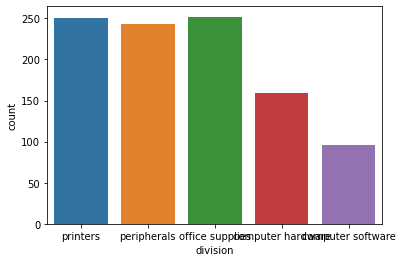

In [9]:
# tapi bisa juga di visualize kaya gini pake countplot
sns.countplot(x='division',data=df)

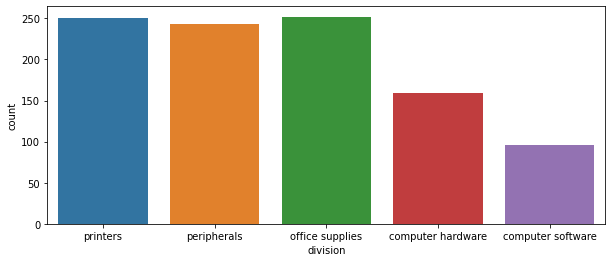

In [12]:
# agak ngeblur sama tulisannya nabrak2
# jadi tambahin plt
plt.figure(figsize=(10,4))
sns.countplot(x='division',data=df)

plt.show()

<AxesSubplot:xlabel='division', ylabel='count'>

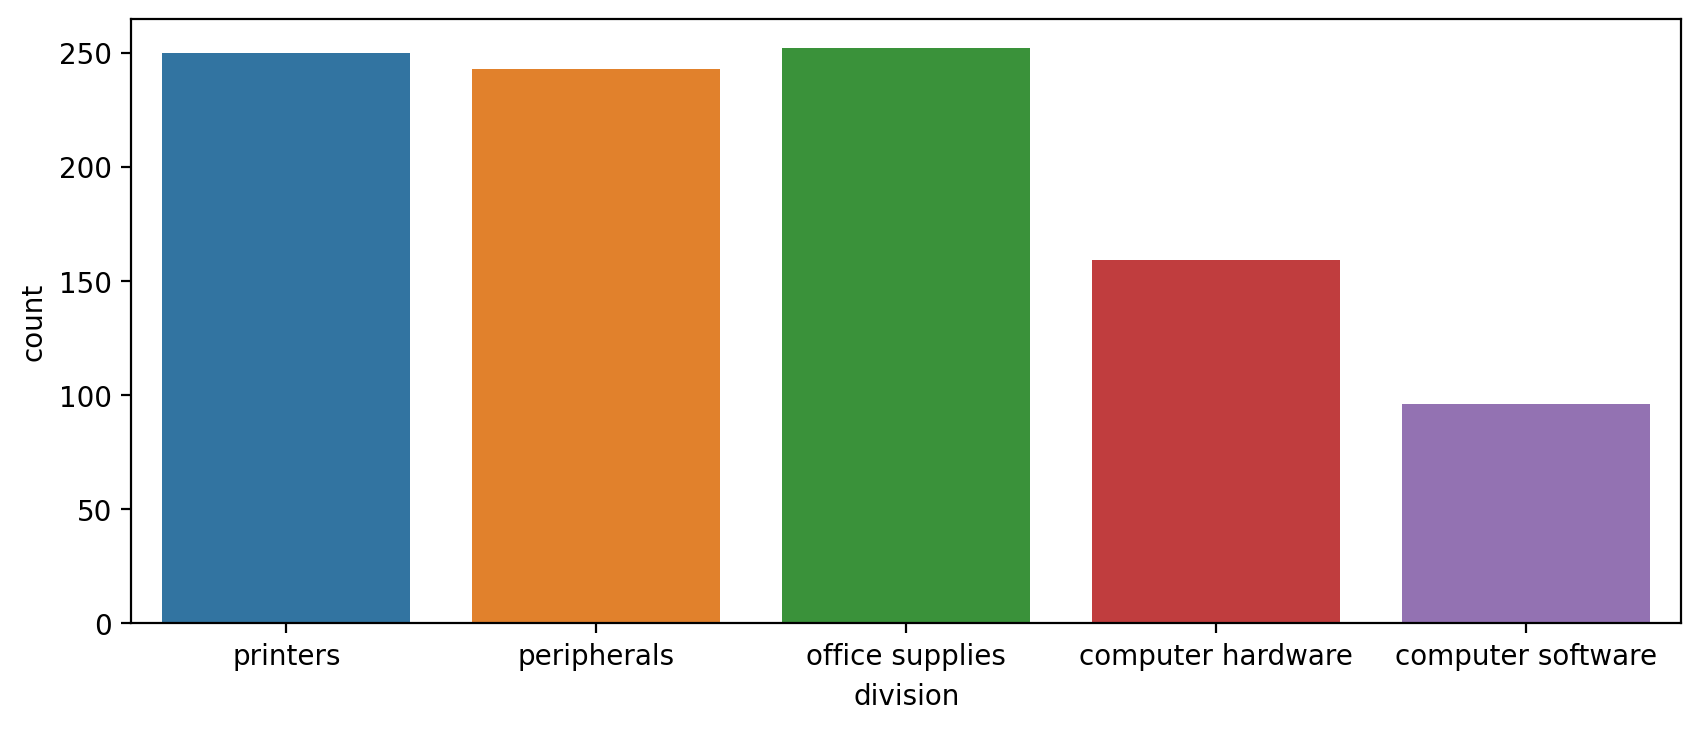

In [14]:
# biar ga ngeblur, naikin dpi nya
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='division',data=df)

#### NOTE KALO ADA DATA Y NYA HARUS SELALU DI SPECIFY,DI PERHATIIN, SOALNYA SEABORN AKAN SELALU PAKE DATA 'COUNT' BUAT Y AXIS DI COUNTPLOT

In [ ]:
# harus selalu perhatiin y axis soalnya bisa di manipulate
# contoh

(90.0, 200.0)

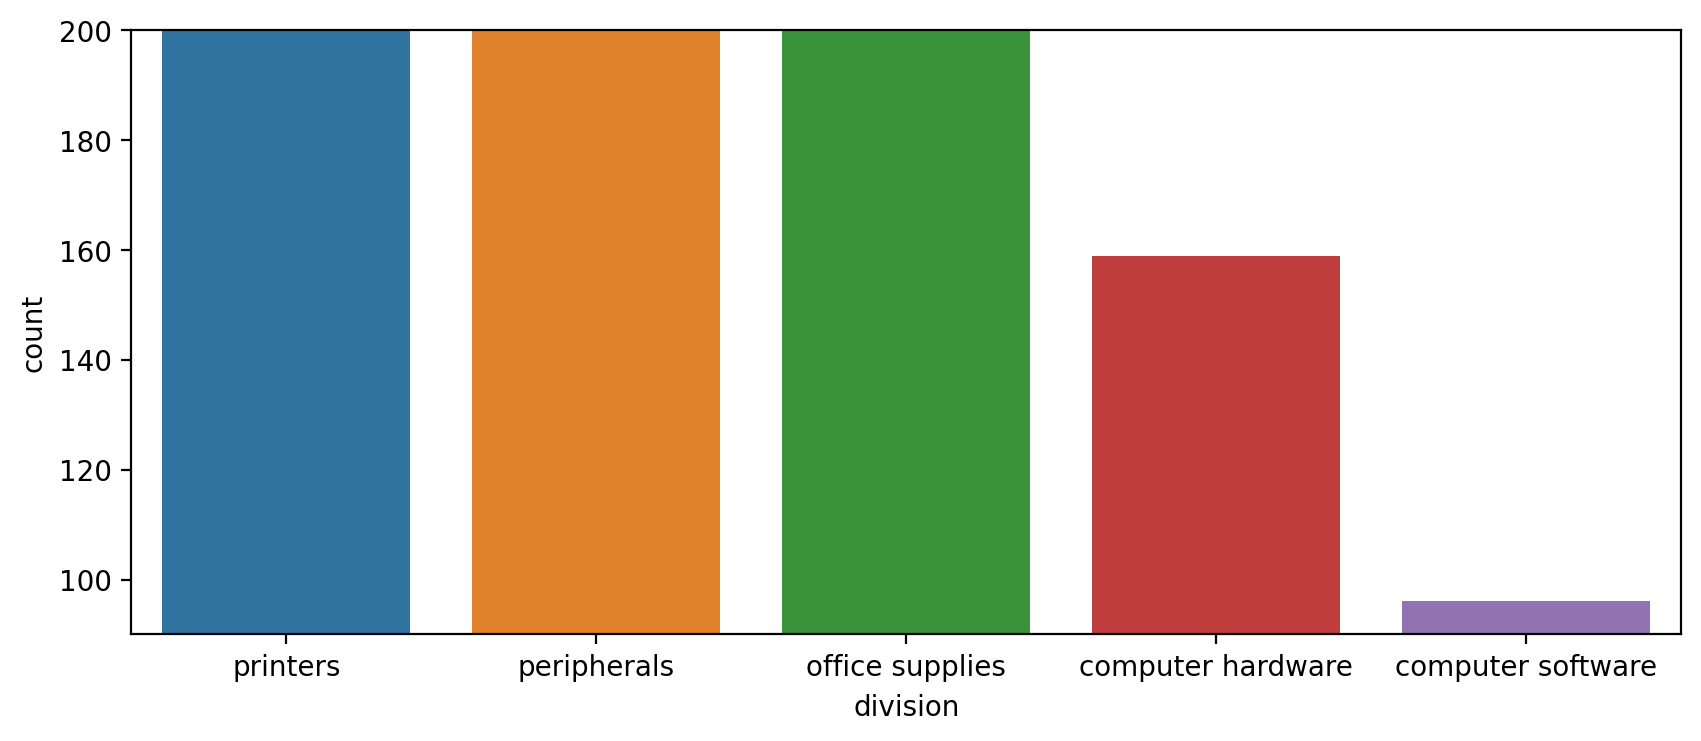

In [15]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='division',data=df)

plt.ylim(90,200)

kita bisa liat plot di atas seakan2 computer sciencenya dikit banget, padahal y nya itu mulai dari 90 sedangkan jumlah total computer science itu 96, jadi harus hati2 perhatiin

In [16]:
# atau bisa juga kayak gini

(0.0, 1000.0)

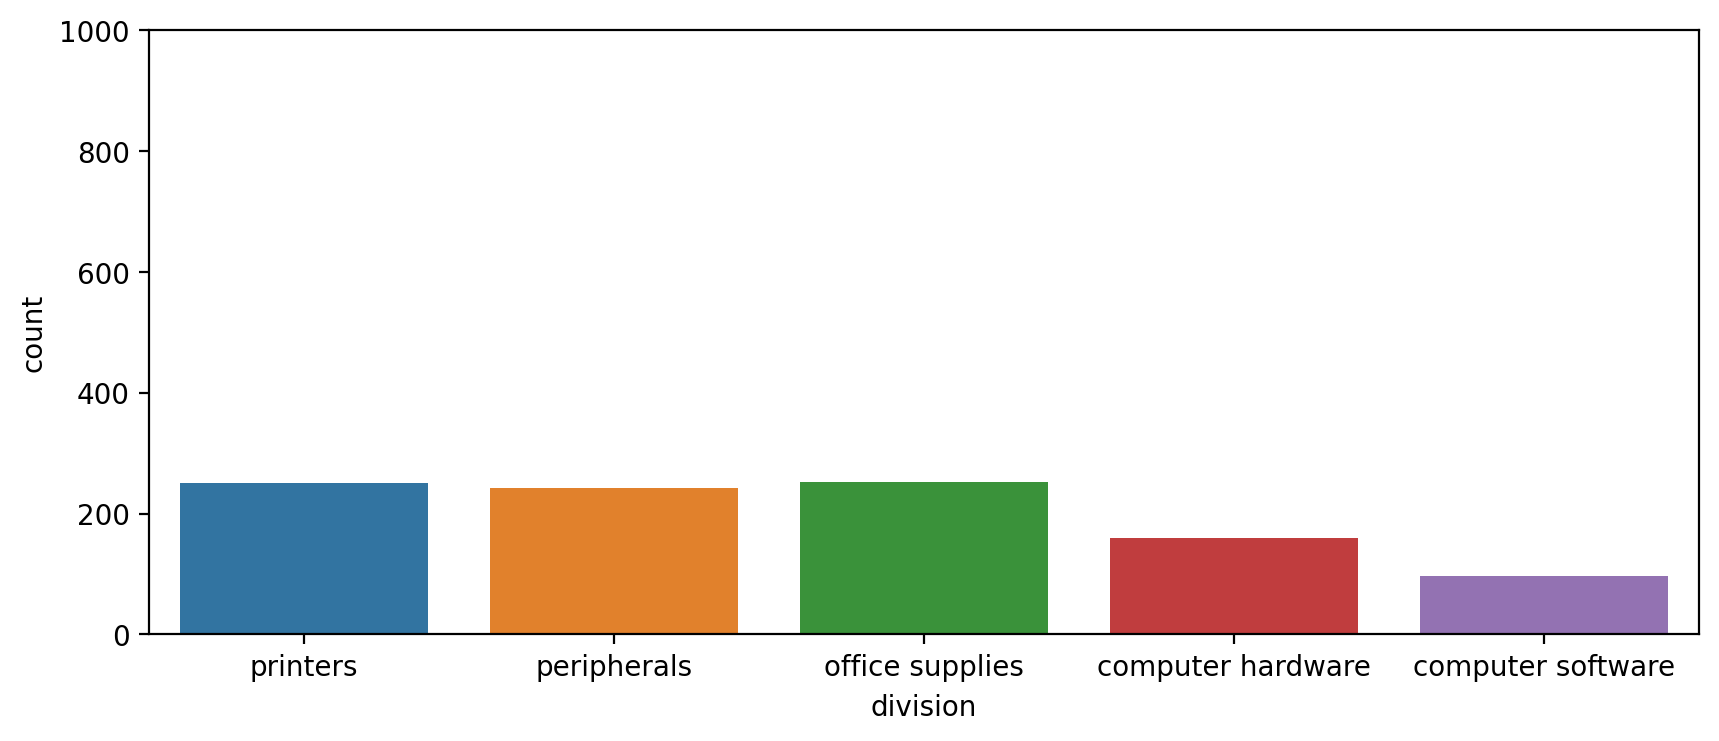

In [17]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='division',data=df)
plt.ylim(0,1000)

kalo kayak gini jadi seakan2 semua hampir sama rata

## jadi yang paling bener itu y nya default pake 'count' dari seaborn buat plot yang lebih accurate.

<AxesSubplot:xlabel='level of education', ylabel='count'>

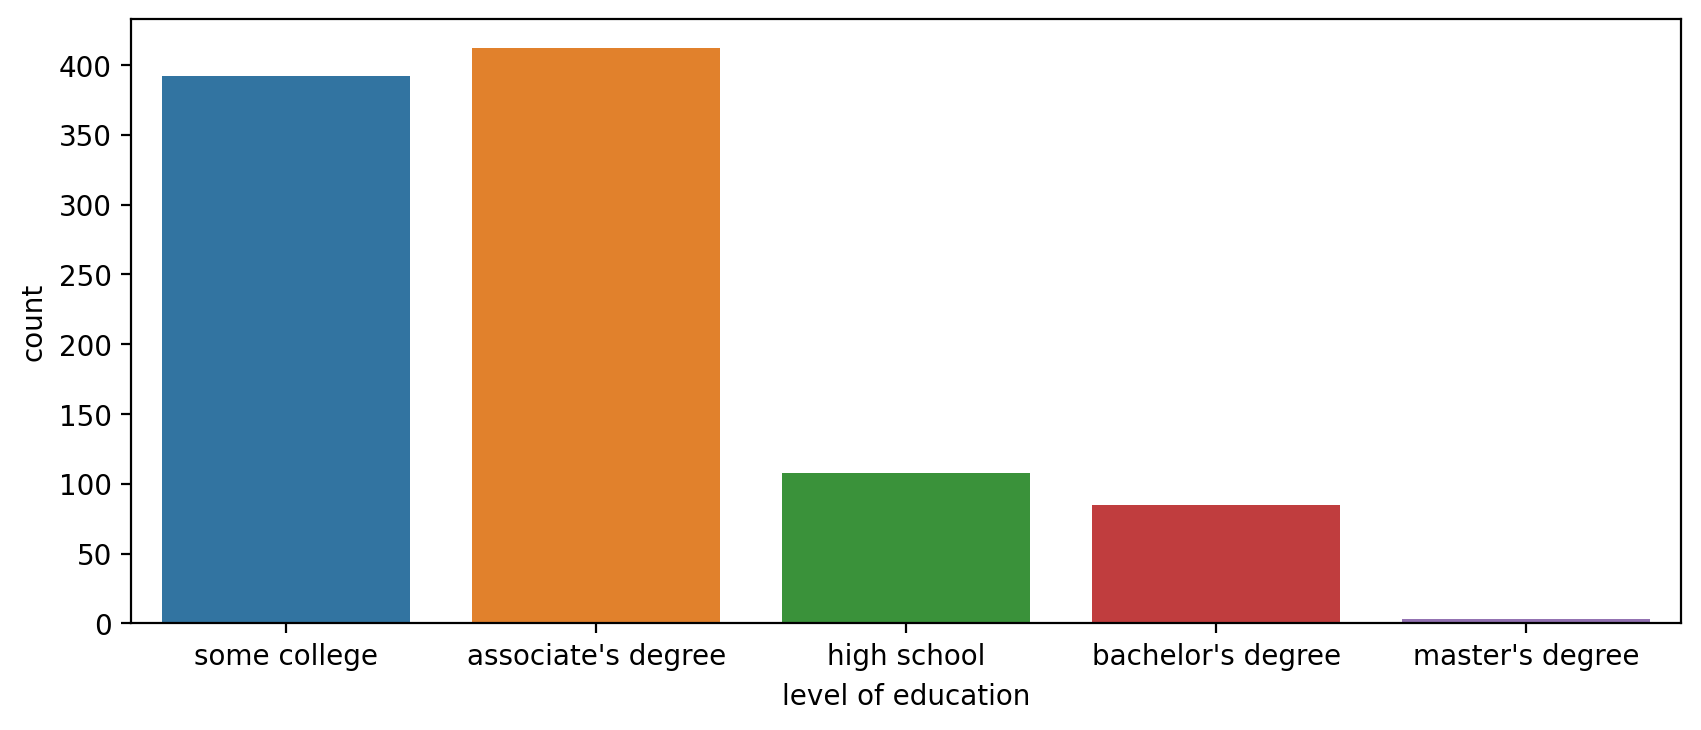

In [18]:
# coba kita liat plot level of education
# tinggal ganti x nya
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='level of education',data=df)

In [19]:
# mastersnya ga keliatan terlalu dikit
# kayak gini buat liat
df['level of education'].value_counts()

associate's degree    412
some college          392
high school           108
bachelor's degree      85
master's degree         3
Name: level of education, dtype: int64

<AxesSubplot:xlabel='level of education', ylabel='count'>

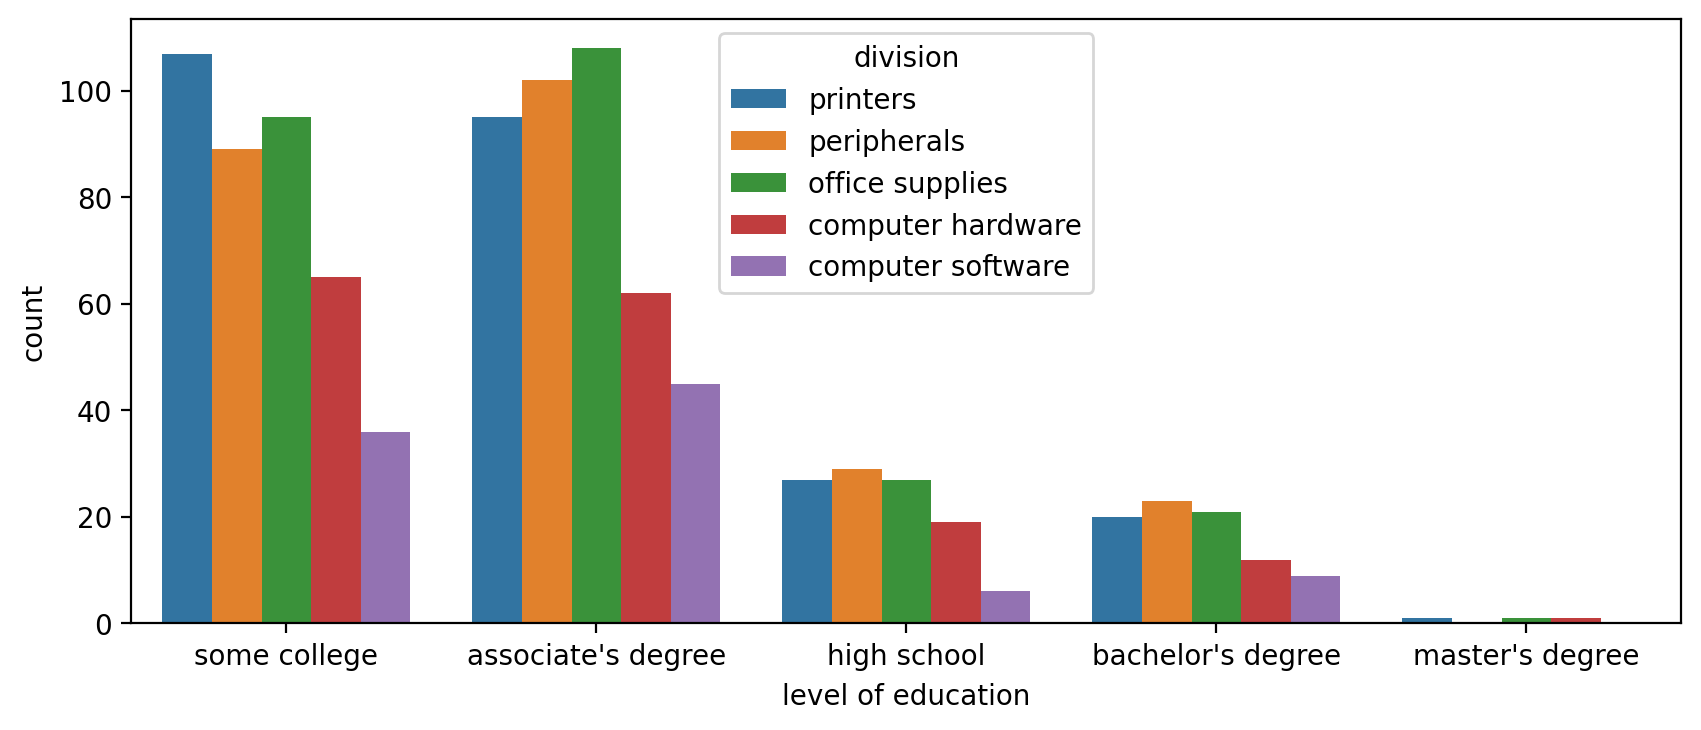

In [22]:
# kita bisa tambahin hue juga dari column lagi
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='level of education',hue='division',data=df)

<AxesSubplot:xlabel='level of education', ylabel='count'>

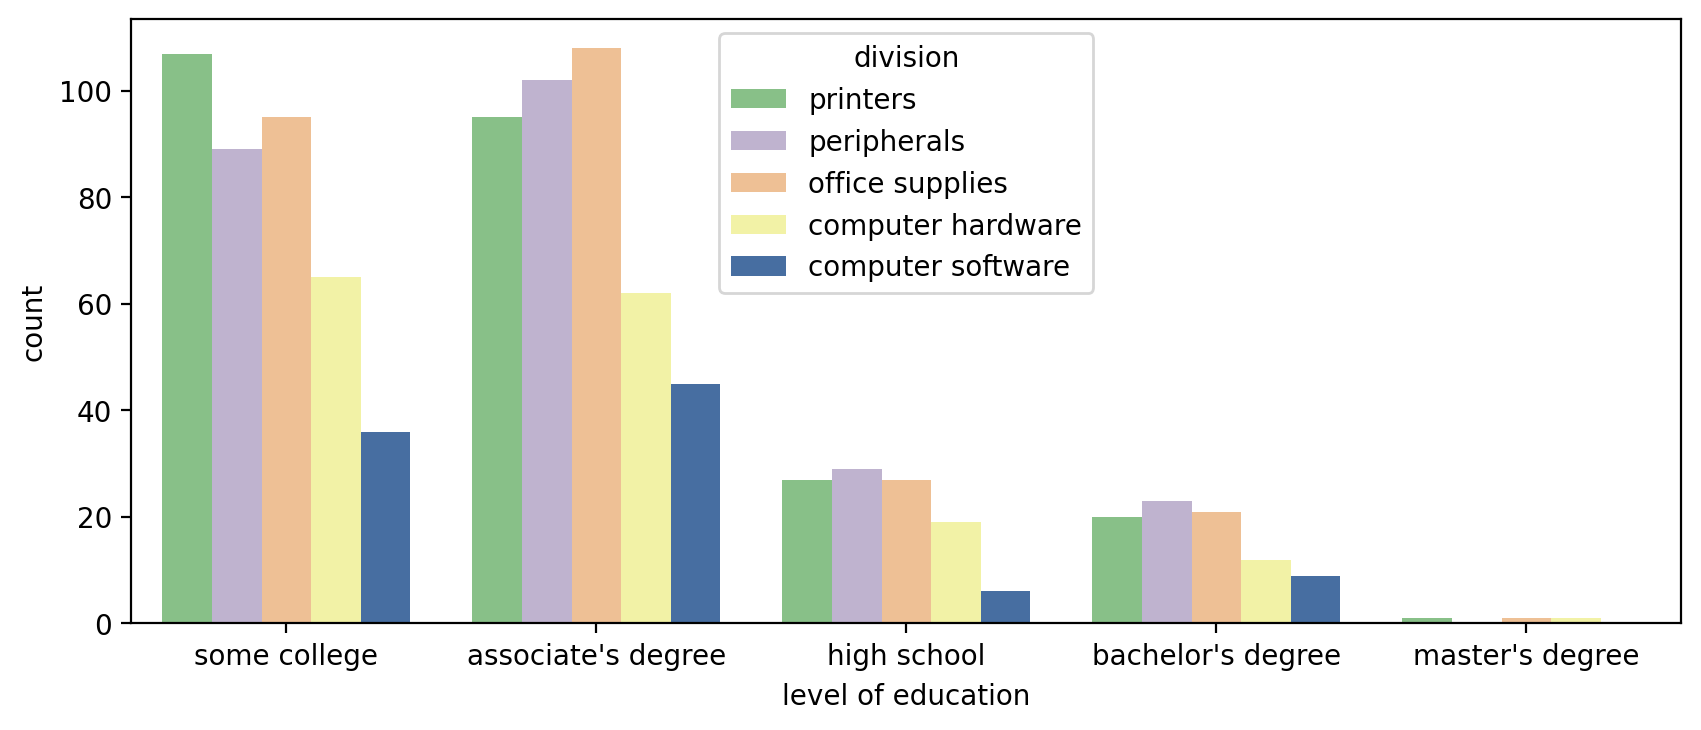

In [27]:
# bisa ganti warna juga
# pastiin pake palette qualitative biar warna ga mirip2
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='level of education',hue='division',palette='Accent',data=df)

In [28]:
# skrg barplot mirip kayak countplot
# tapi ada value y instead of count
# y nya harus continuous column (salary,age,gitu2)

<AxesSubplot:xlabel='level of education', ylabel='salary'>

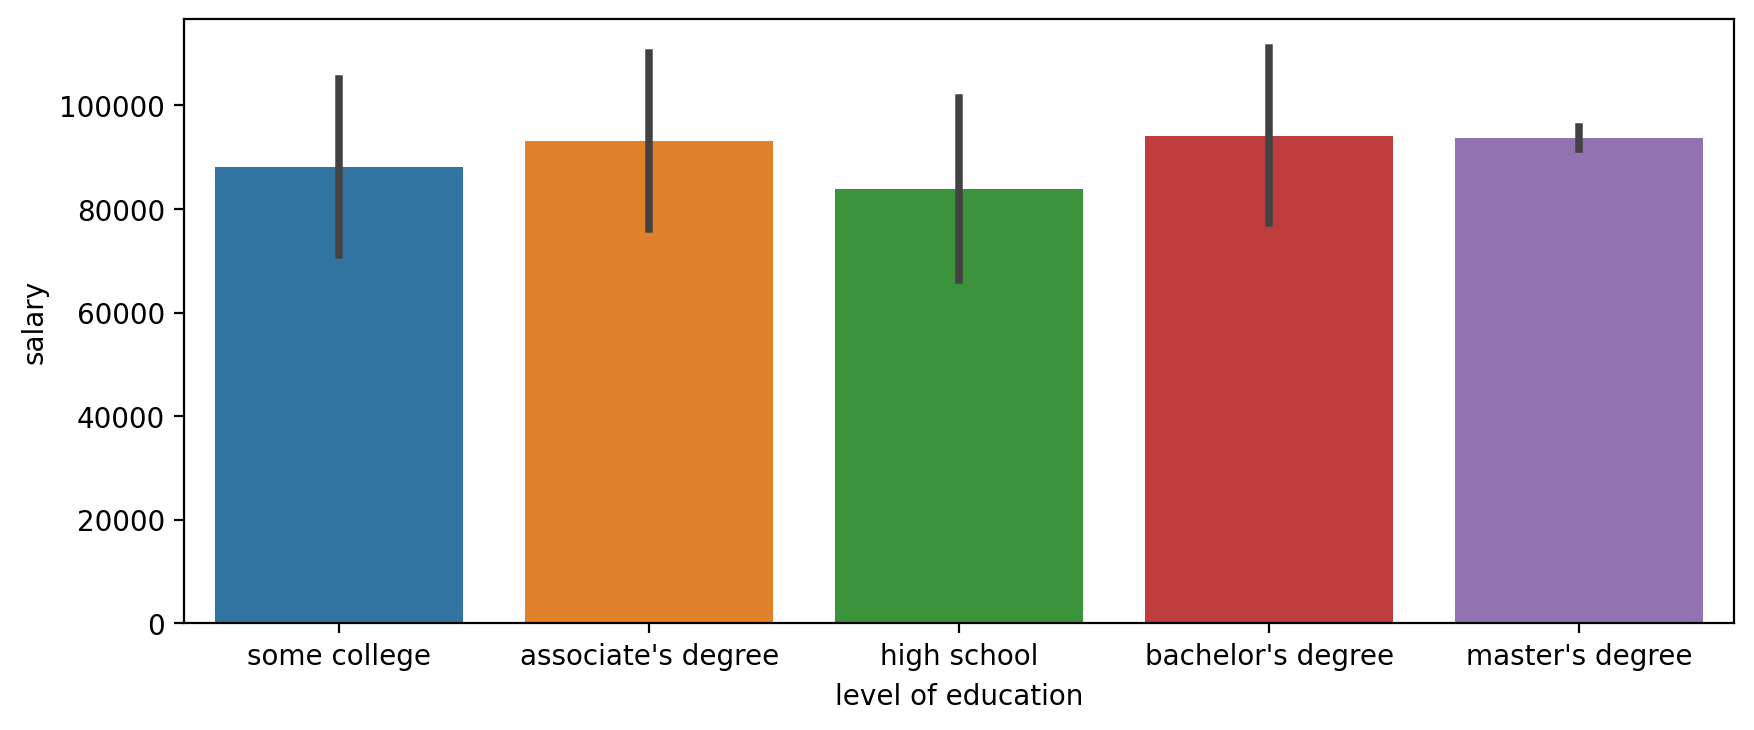

In [31]:
# estimator itu buat itung kita mau tampilin apa per barnya
# defaultnya itu mean, jadi perbar itu average data
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=df,x='level of education',y='salary',estimator=np.mean,ci='sd')

note: average dari level of education itu cuma 1 data dan ga seharusnya di tampilin pake bar, harusnya lebih bagus pake table biar informasi nya lebih jelas, master degree juga kan cuma 3 orang tapi di sini jadi ga keliatan. JADI KITA HARUS PINTER CARI CARA BUAT NAMPILIN INFO YANG LEBIH JELAS DAN AKURAT

<AxesSubplot:xlabel='level of education', ylabel='salary'>

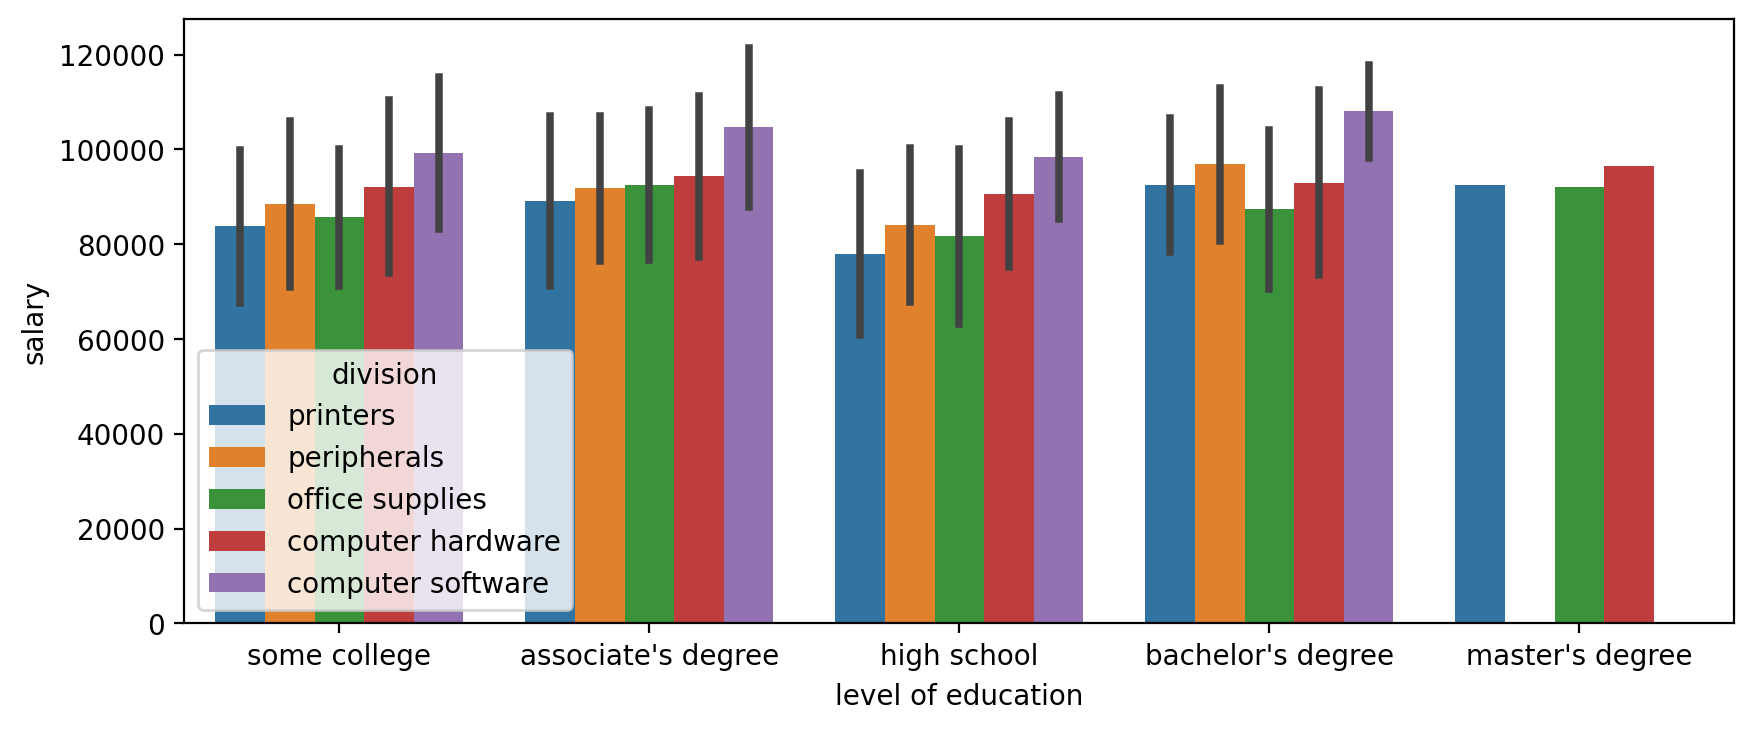

In [33]:
# kita tambah hue
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=df,hue='division',x='level of education',y='salary',estimator=np.mean,ci='sd')

masters nya ga punya bar ci 'std' soalnya emang cuma 3 orang.

kita bisa liat legendnya jadi nutupin, jadi kita pake knowlegde matplotlib kita buat pindahin legendnya

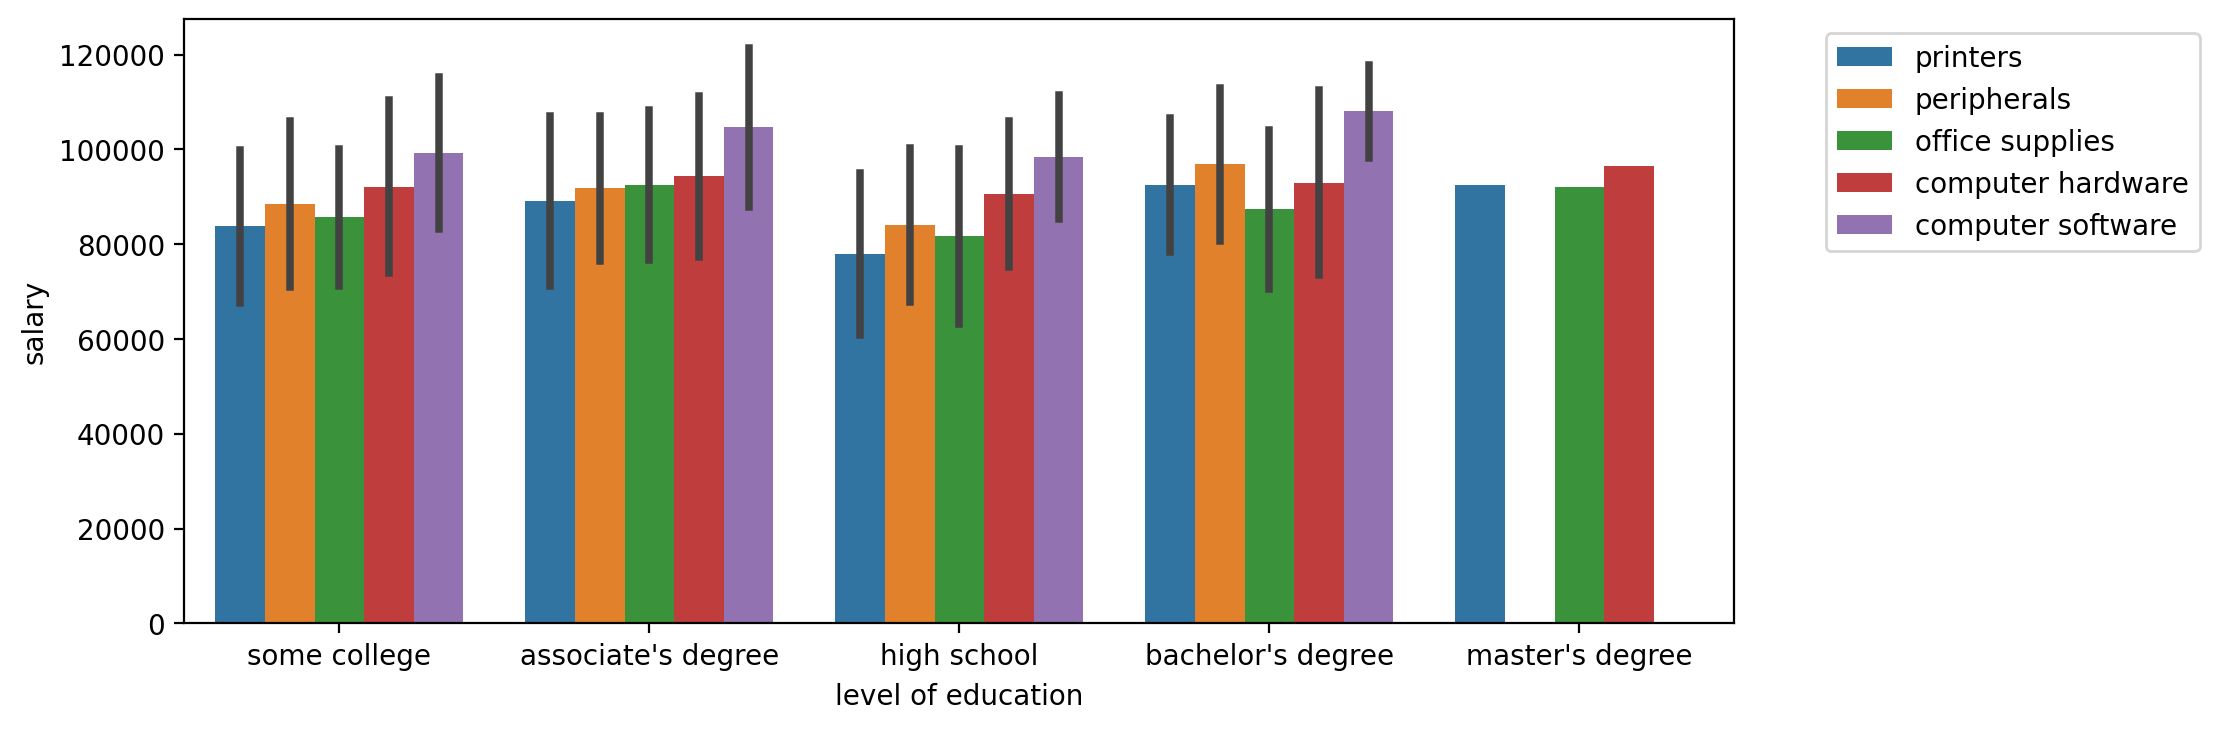

In [34]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=df,hue='division',x='level of education',y='salary',estimator=np.mean,ci='sd')

plt.legend(bbox_to_anchor=(1.05,1))

# Categorical Plots - Distribution within Categories

So far we've seen how to apply a statistical estimation (like mean or count) to categories and compare them to one another. Let's now explore how to visualize the distribution within categories. We already know about distplot() which allows to view the distribution of a single feature, now we will break down that same distribution per category.

nonton video udemy yang categorical plots - distributions within categories - understanding plot types buat ngertiin tiap plotnya, kalo lupa

brief cepet aja, kalo di box plot, itu di bagi 4 quarter, box tengah nya itu namanya Interquartile Range(IQR), garis tengah nya itu median, jadi box tengah itu Q1-Q3.

daerah di luar boxnya itu besarnya 1.5x ukuran IQR

In [35]:
df = pd.read_csv('/Users/clcx/Documents/GitHub/My-Python-Learning/Udemy Repo/Machine Learning/05-Seaborn/StudentsPerformance.csv')

In [36]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [41]:
len(df)

1000

## Boxplot

As described in the video, a boxplot display distribution through the use of quartiles and an IQR for outliers.

<AxesSubplot:xlabel='test preparation course', ylabel='reading score'>

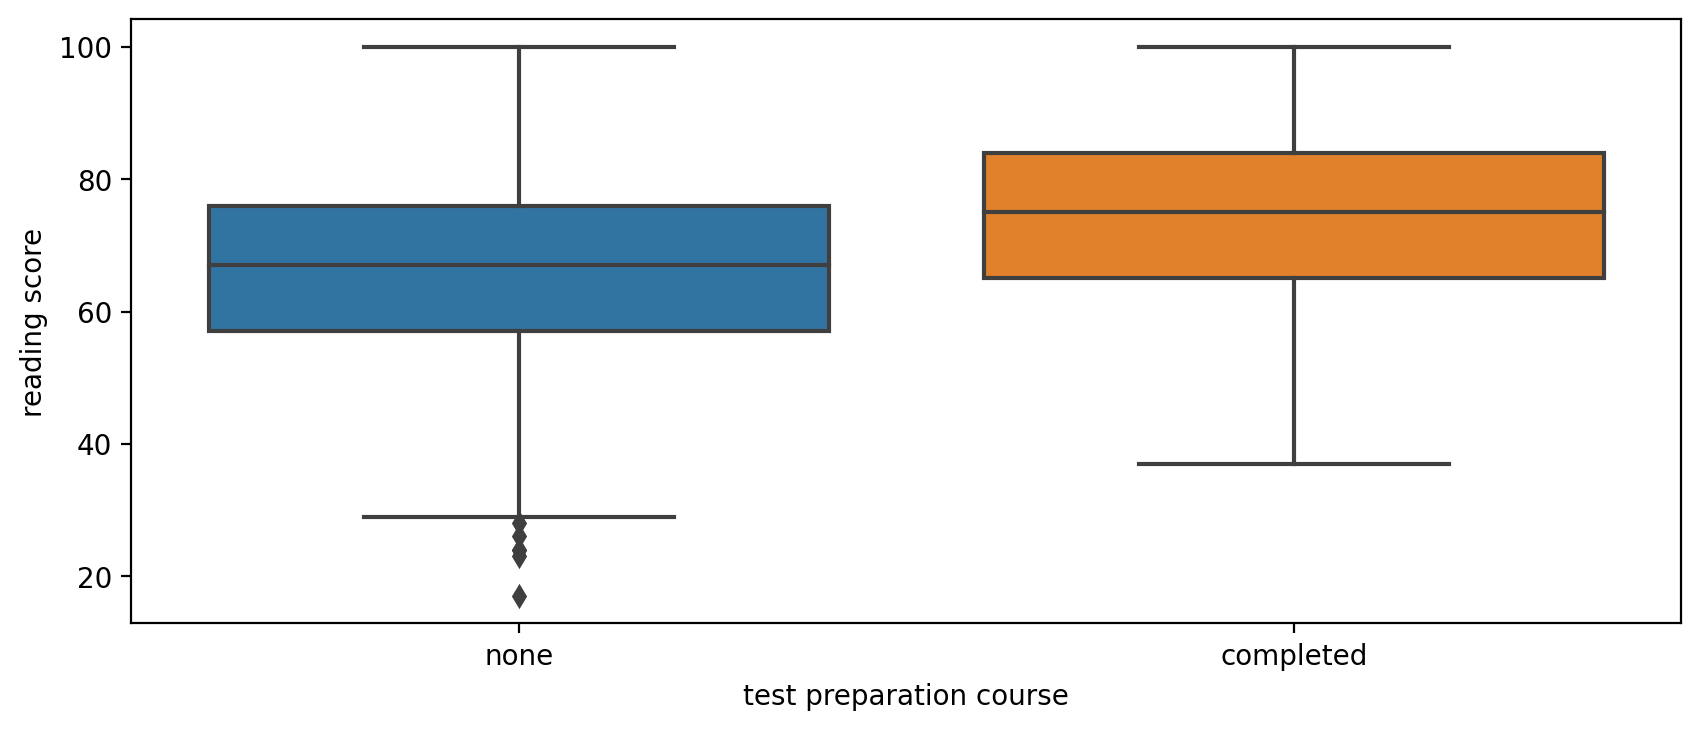

In [42]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='reading score',x='test preparation course')

# jadi kita bisa liat emang berarti murid yang ambil test prep reading nya lebih tinggi

<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

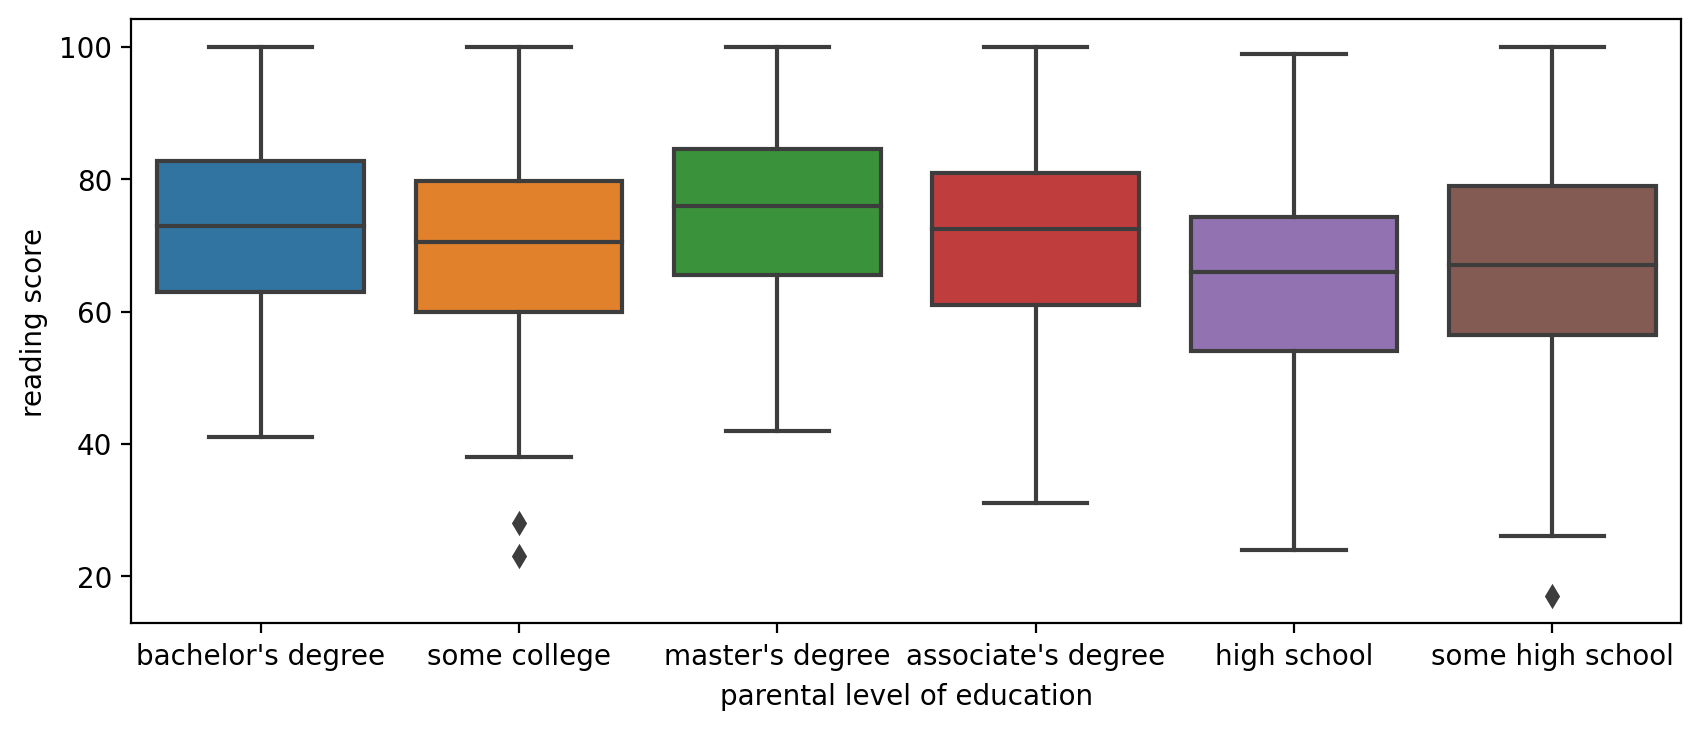

In [43]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='reading score',x='parental level of education')

<AxesSubplot:xlabel='parental level of education', ylabel='reading score'>

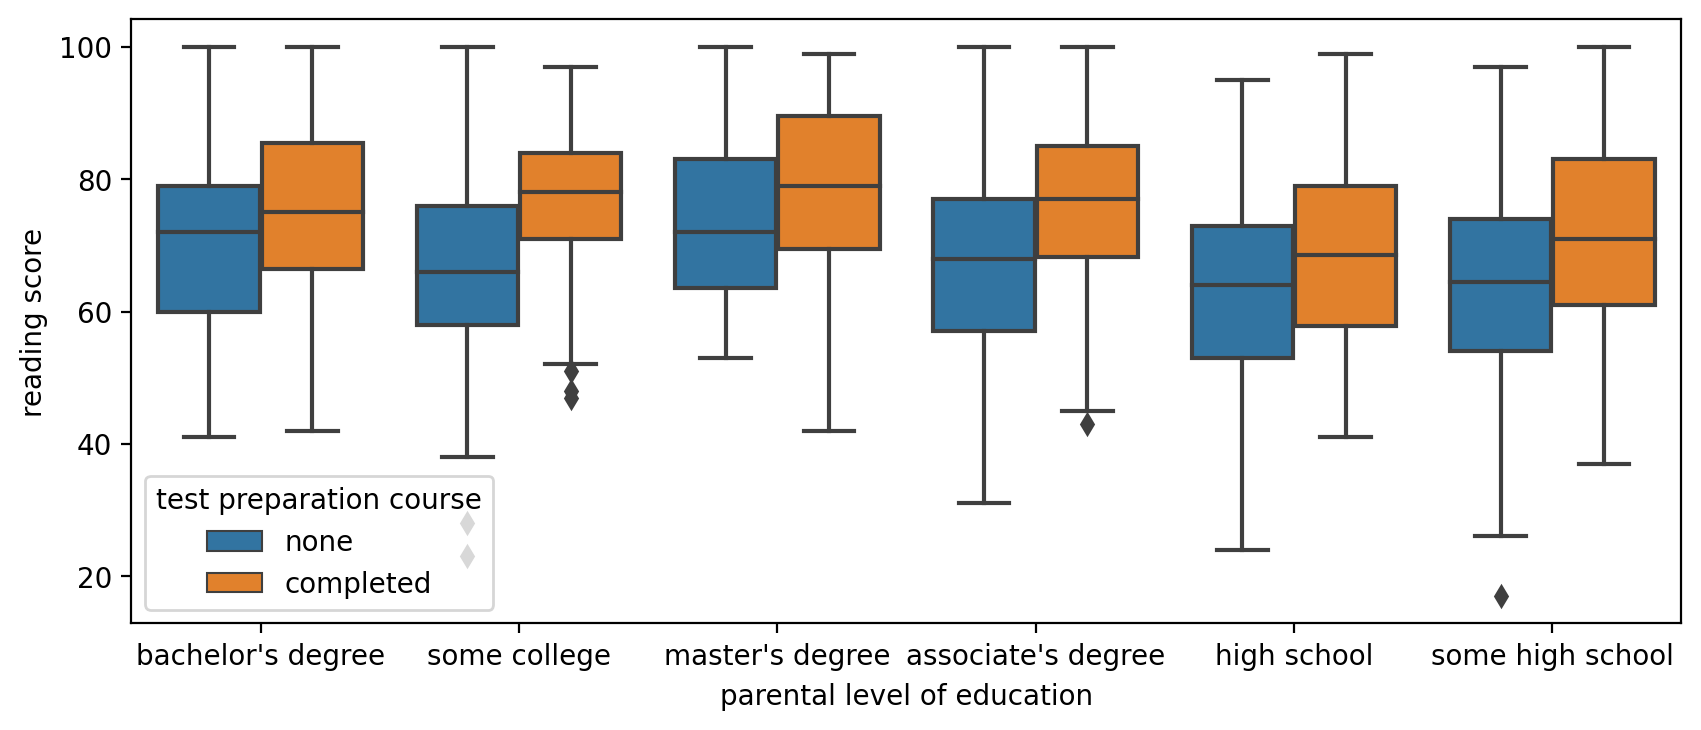

In [45]:
# kita bisa juga tambahin hue
# bisa ada subcategories dari large categories
# intinya di bagi lagi categorynya

plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='reading score',x='parental level of education',hue='test preparation course')

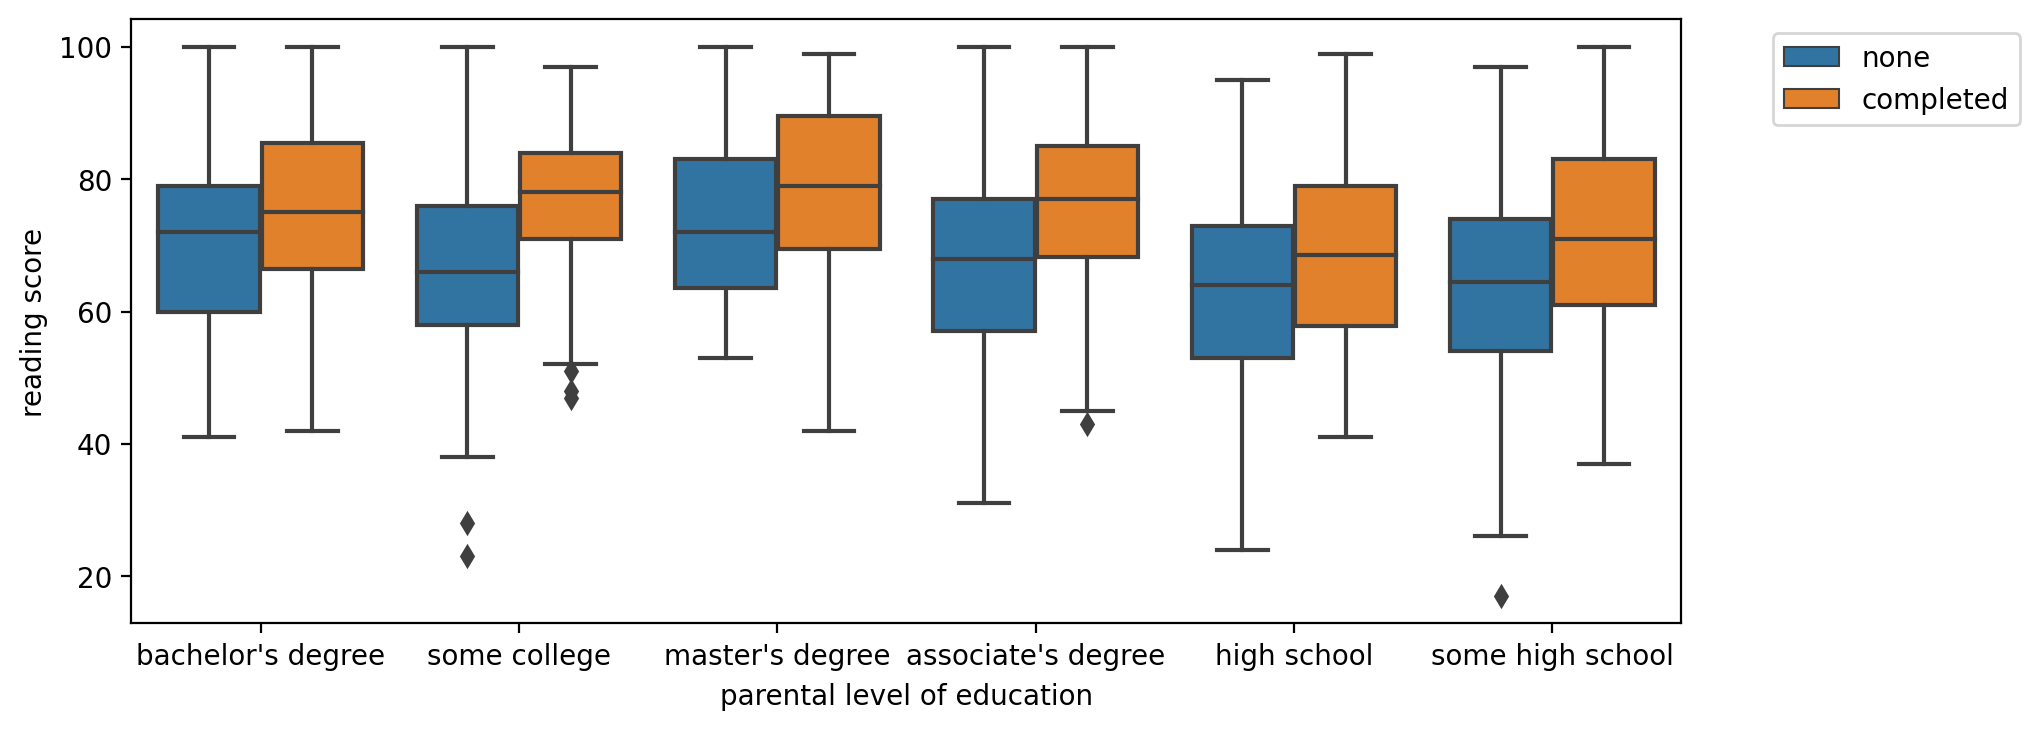

In [46]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,y='reading score',x='parental level of education',hue='test preparation course')

plt.legend(bbox_to_anchor=(1.05,1)) # biar ga ngalangin

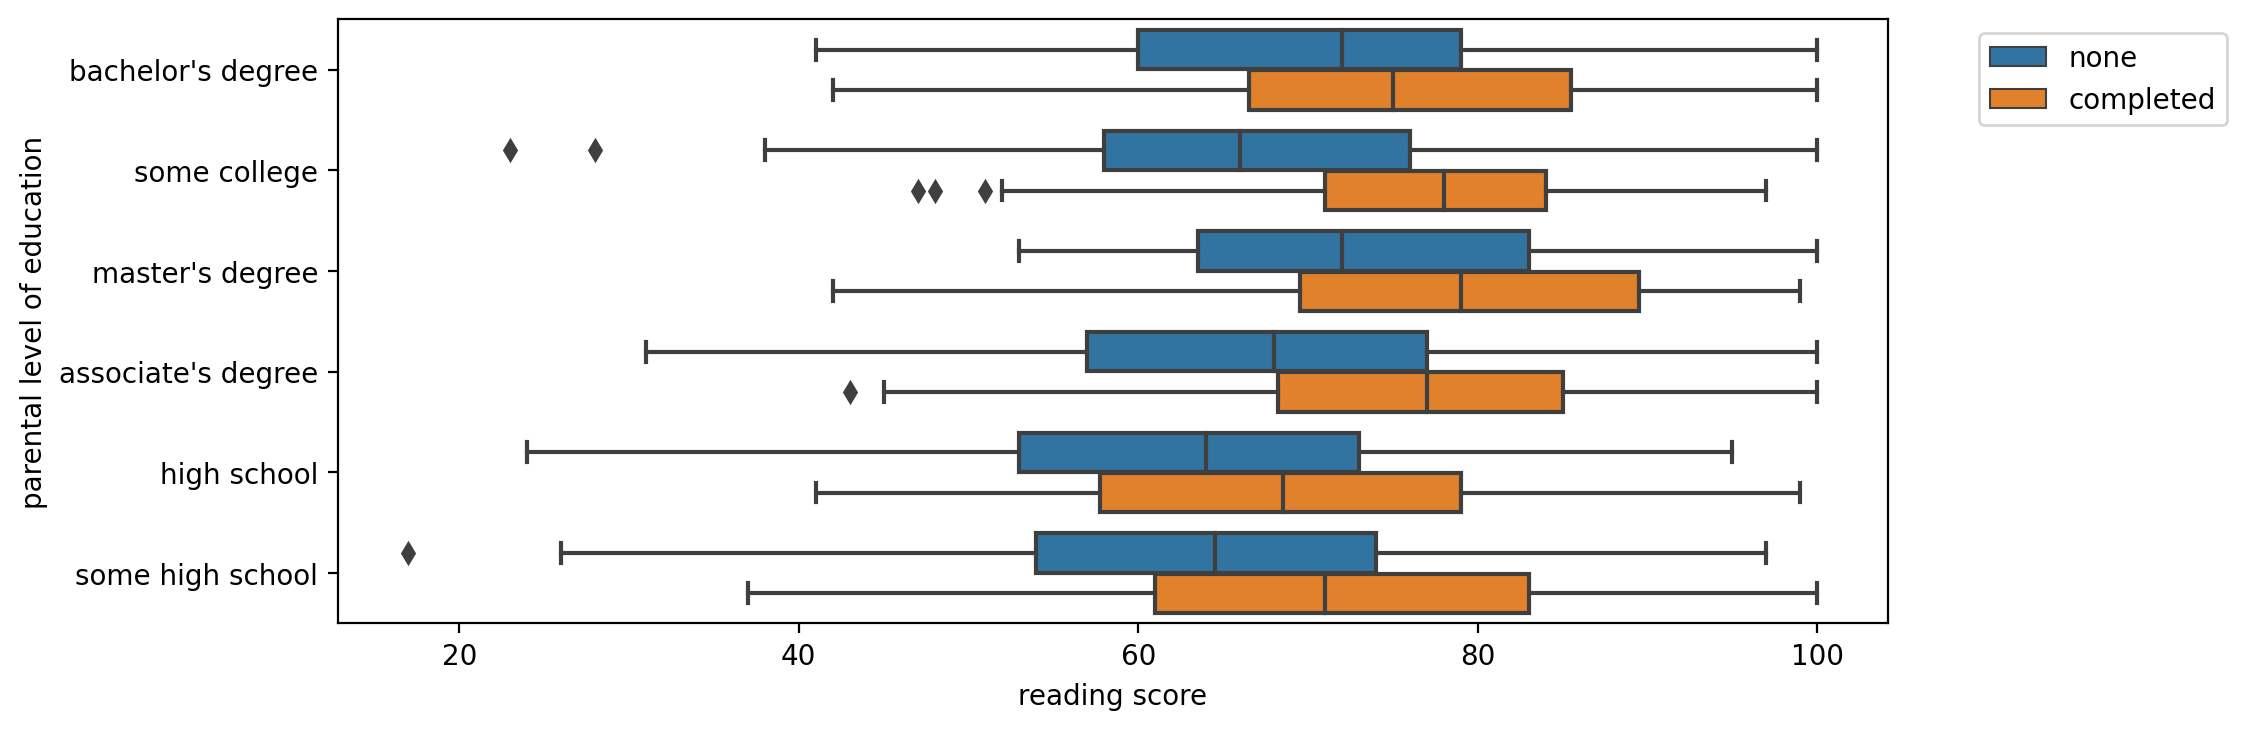

In [47]:
# skrg kita coba flip x sama y nya
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,x='reading score',y='parental level of education',hue='test preparation course')

plt.legend(bbox_to_anchor=(1.05,1))

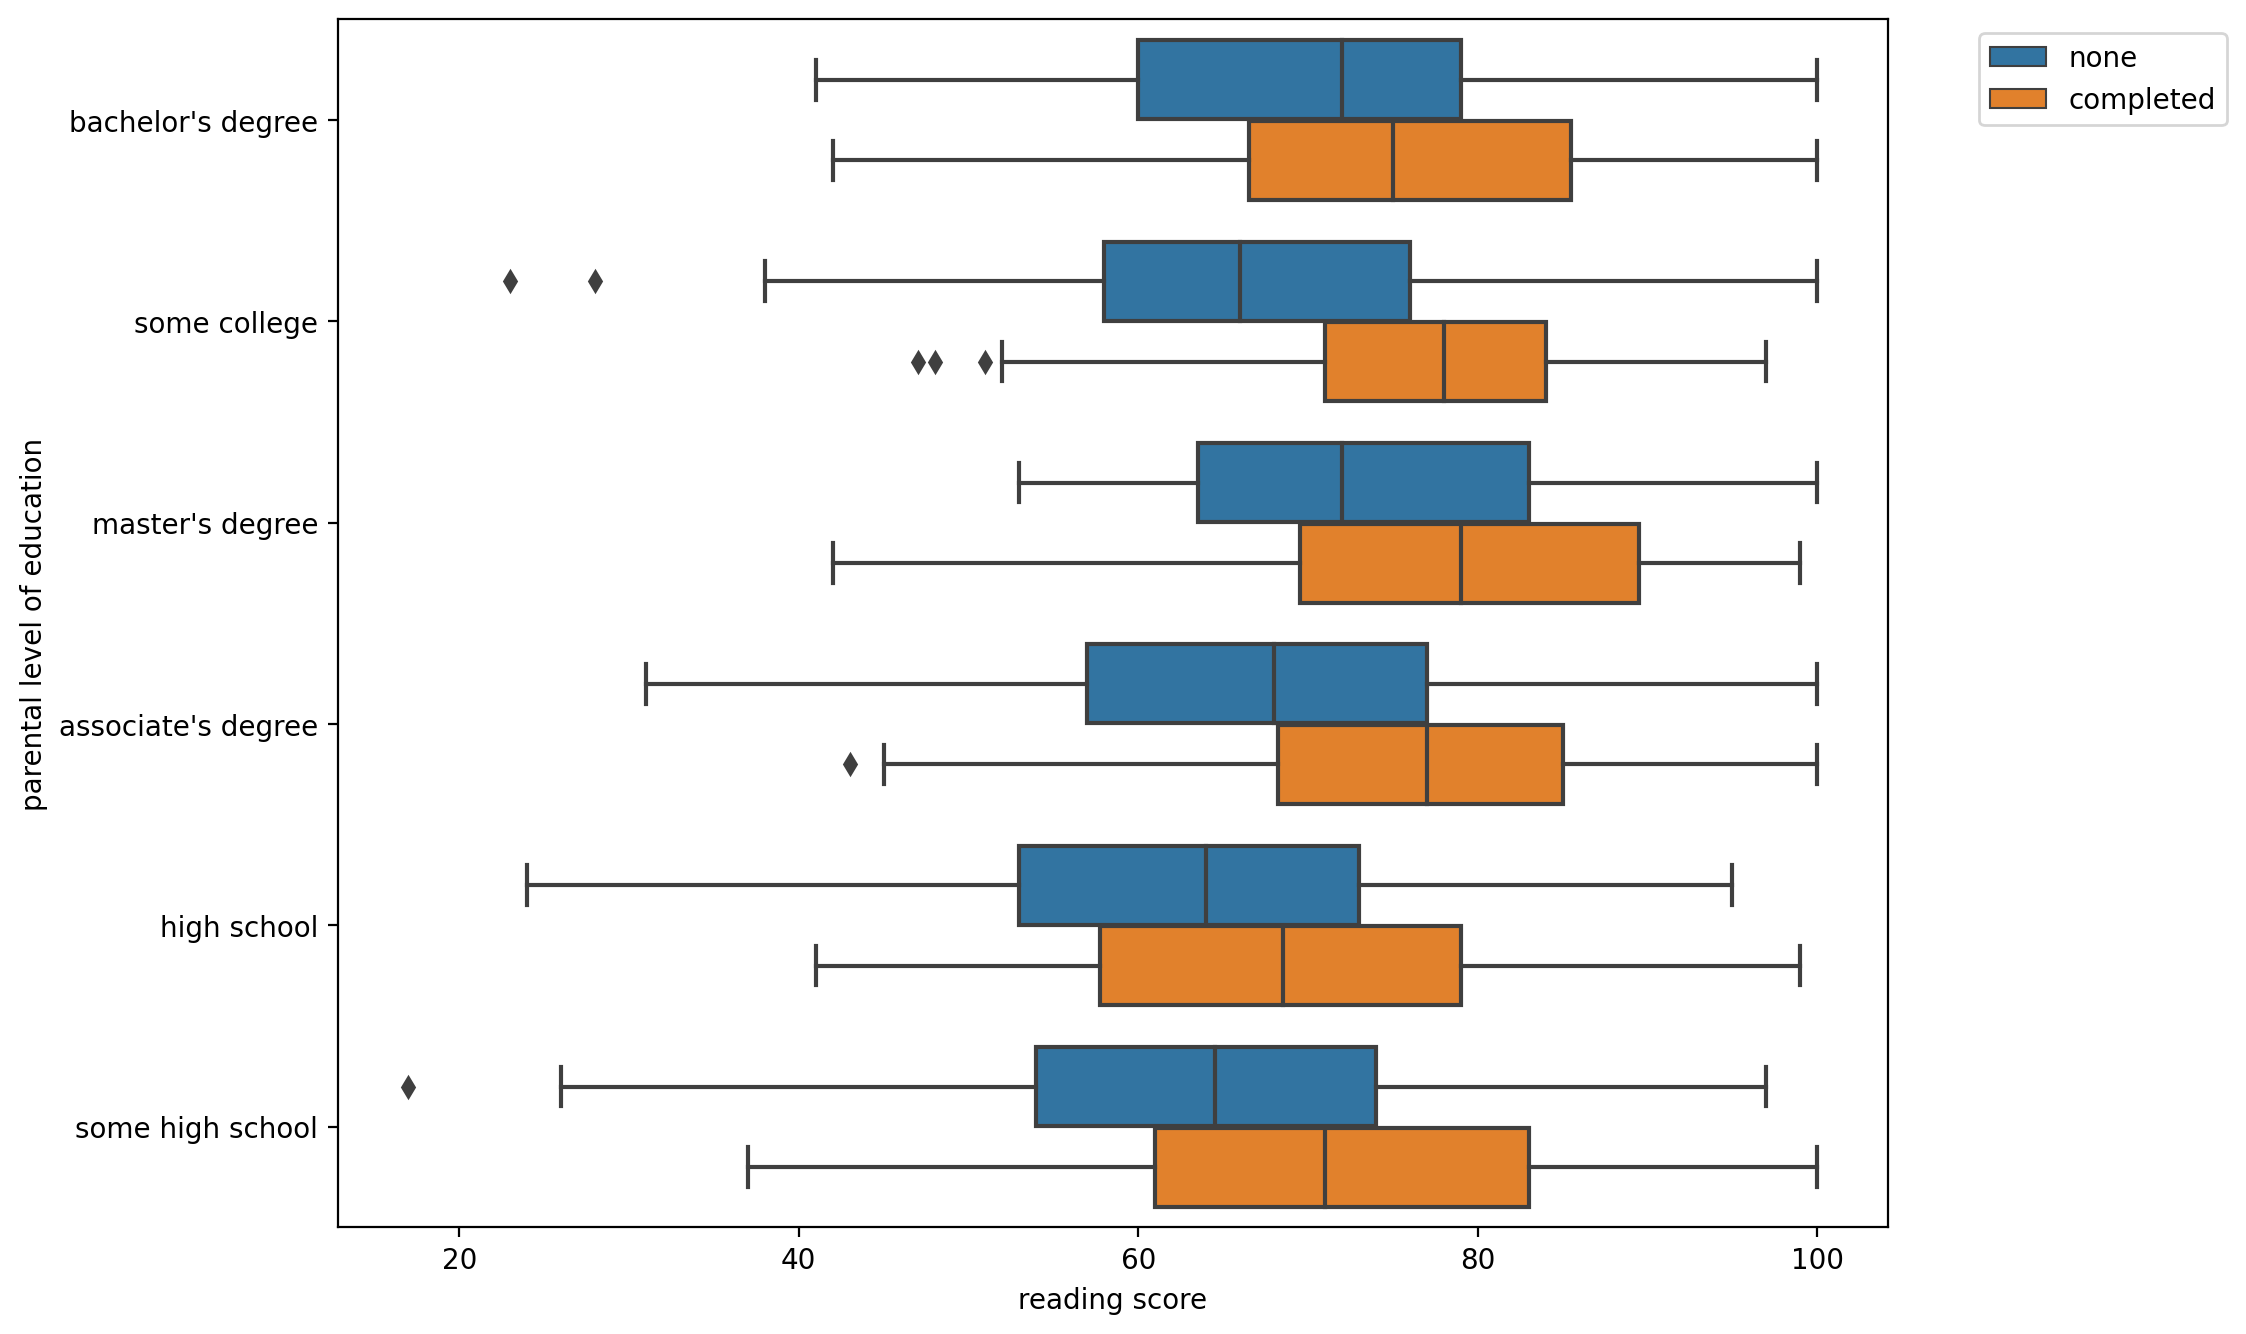

In [48]:
# kalo kekecilan bisa di atur figsizenya
plt.figure(figsize=(10,8),dpi=200)
sns.boxplot(data=df,x='reading score',y='parental level of education',hue='test preparation course')

plt.legend(bbox_to_anchor=(1.05,1))

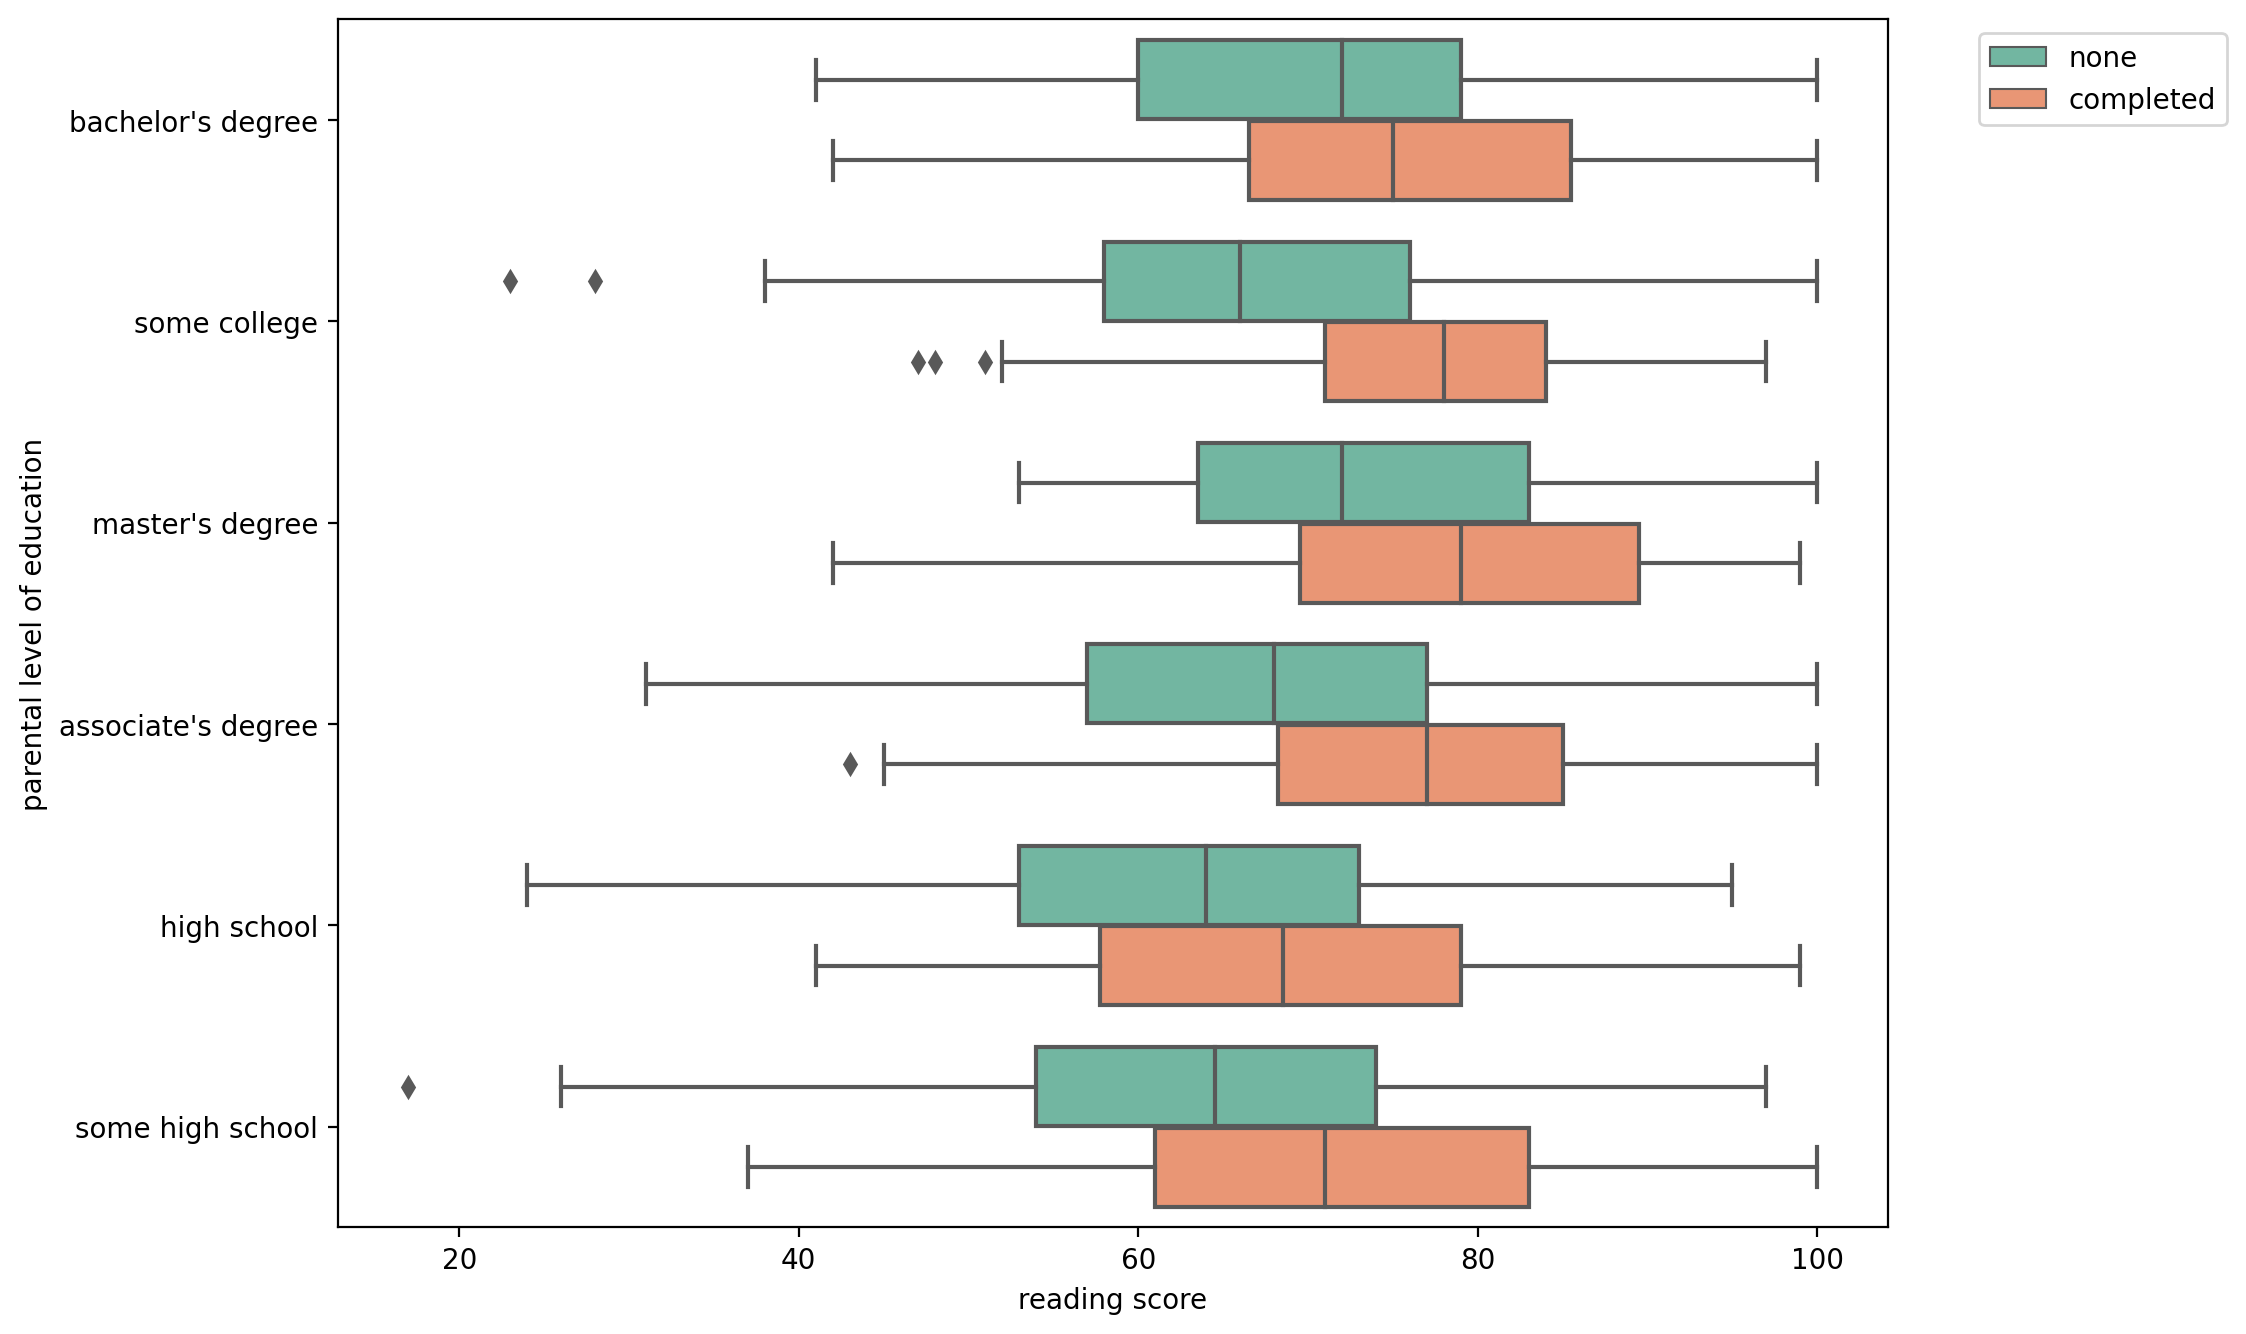

In [50]:
# bisa ganti color palette nya juga
plt.figure(figsize=(10,8),dpi=200)
sns.boxplot(data=df,x='reading score',y='parental level of education',
hue='test preparation course',palette='Set2')

plt.legend(bbox_to_anchor=(1.05,1))

## Violinplot

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

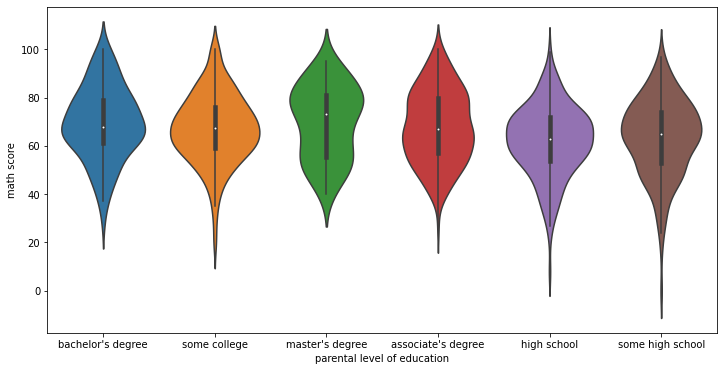

In [51]:
plt.figure(figsize=(12,6))
sns.violinplot(x='parental level of education',y='math score',data=df)

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

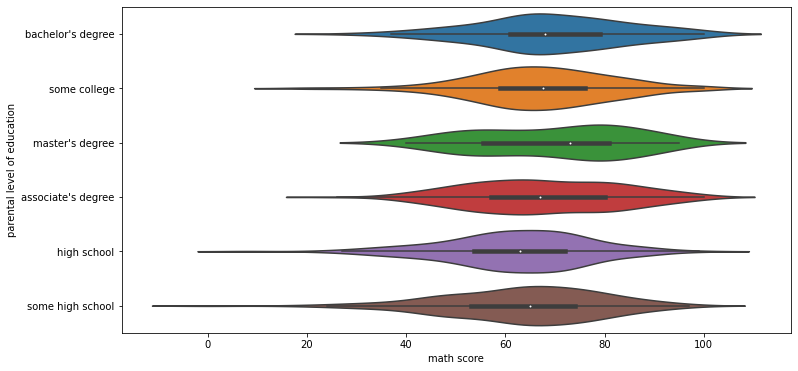

In [52]:
# bisa di balik juga
plt.figure(figsize=(12,6))
sns.violinplot(y='parental level of education',x='math score',data=df)

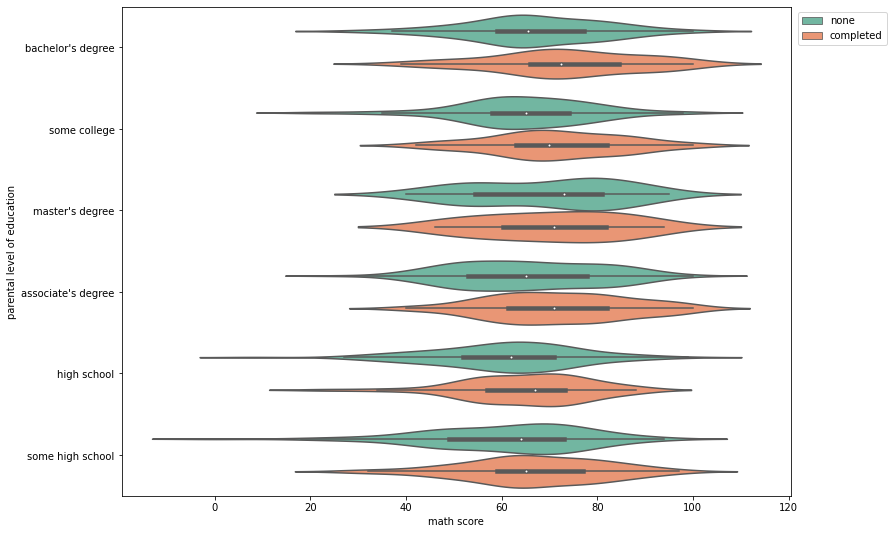

In [57]:
# bisa juga pake hue, color palette, legend

plt.figure(figsize=(12,9))
sns.violinplot(y='parental level of education',x='math score',data=df,hue='test preparation course',palette='Set2')

plt.legend(bbox_to_anchor=(1.15,1))

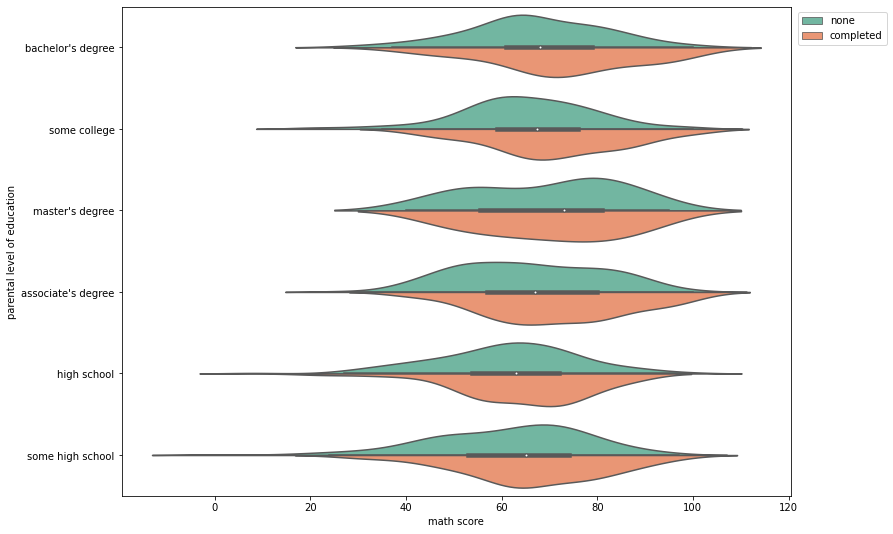

In [58]:
# kalo di violin plot kita bisa pake split
# ini cuma berlaku buat 2 categories
# jadi instead of 2 violin bertumpuk, jadinya di gabung jadi 1 atas bawah

plt.figure(figsize=(12,9))
sns.violinplot(y='parental level of education',x='math score',data=df,
hue='test preparation course',palette='Set2',split=True)

plt.legend(bbox_to_anchor=(1.15,1))

cuma note aja, violin plot ini susah dibaca, dan ga semua orang ngerti, jadi mending pake box plot aja, atau ga terserah, yang penting pastiin audiencenya ngerti sama violin plot dan ga kesusahan bacanya

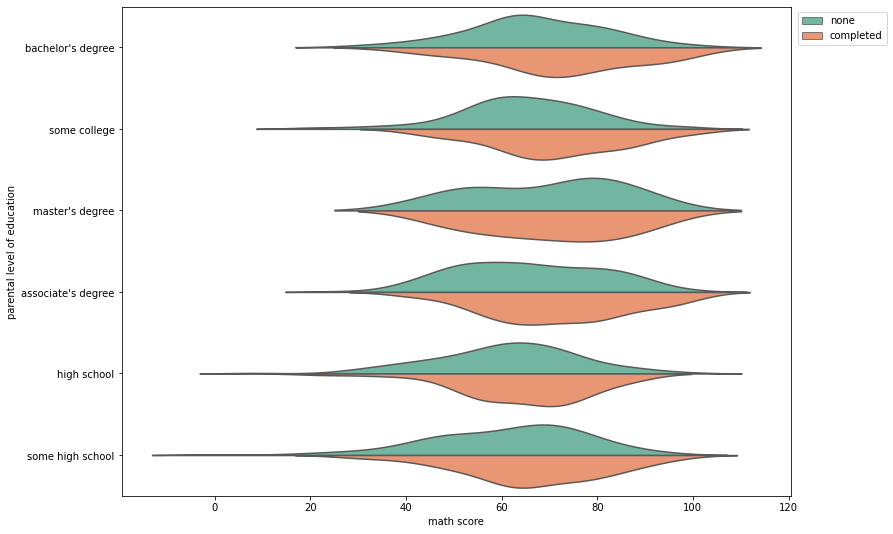

In [59]:
# dan kita bisa ilangin bar item tengah Quartile Median nya
# inner=None

plt.figure(figsize=(12,9))
sns.violinplot(y='parental level of education',x='math score',data=df,
hue='test preparation course',palette='Set2',split=True,inner=None)

plt.legend(bbox_to_anchor=(1.15,1))

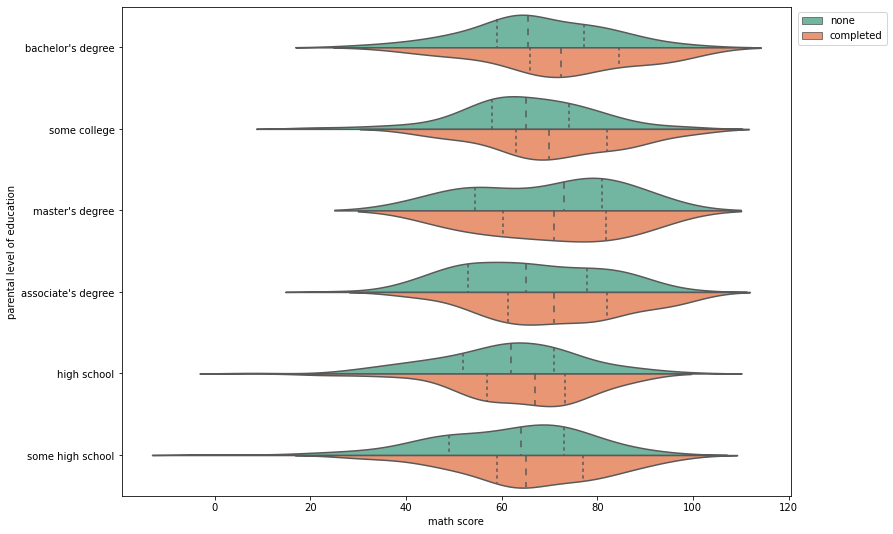

In [60]:
# bisa juga bikin garis quartile nya
# inner='quartile

plt.figure(figsize=(12,9))
sns.violinplot(y='parental level of education',x='math score',data=df,
hue='test preparation course',palette='Set2',split=True,inner='quartile')

plt.legend(bbox_to_anchor=(1.15,1))

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

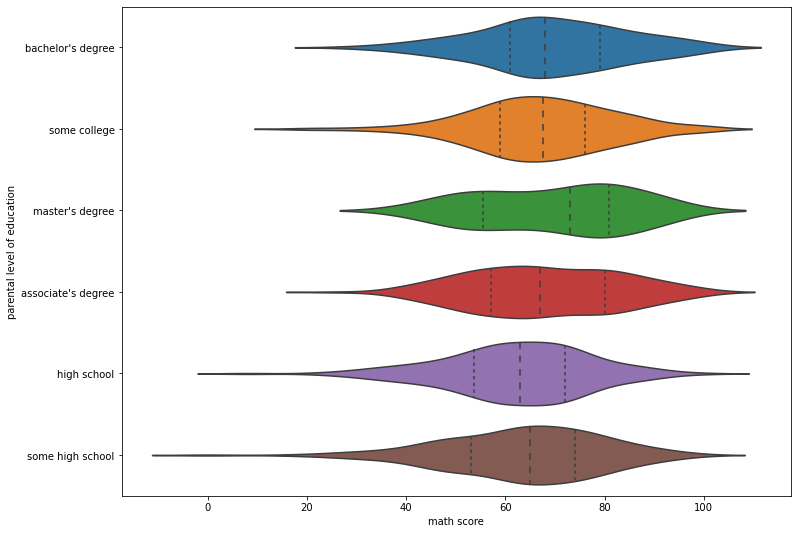

In [61]:
# kita bikin lebih jelas

plt.figure(figsize=(12,9))
sns.violinplot(y='parental level of education',x='math score',data=df
,split=True,inner='quartile')

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

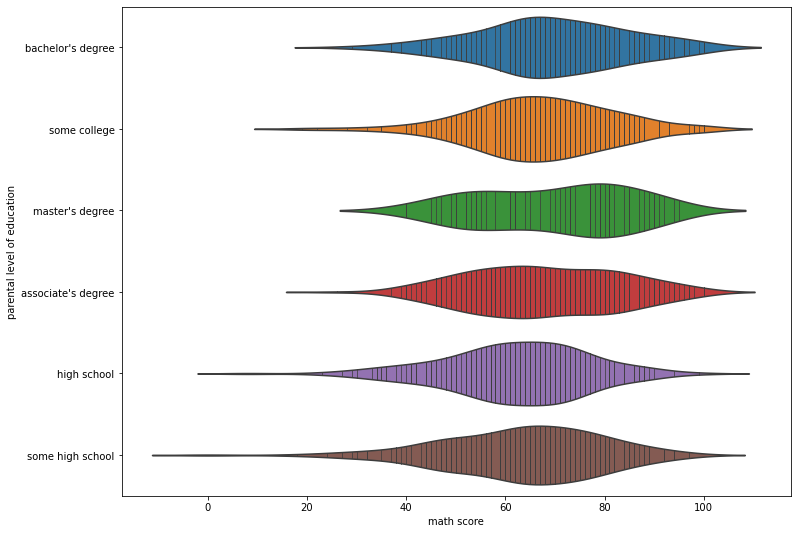

In [62]:
# inner='stick'
# buat liat distribution nya along this KDE

plt.figure(figsize=(12,9))
sns.violinplot(y='parental level of education',x='math score',data=df
,split=True,inner='stick')

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

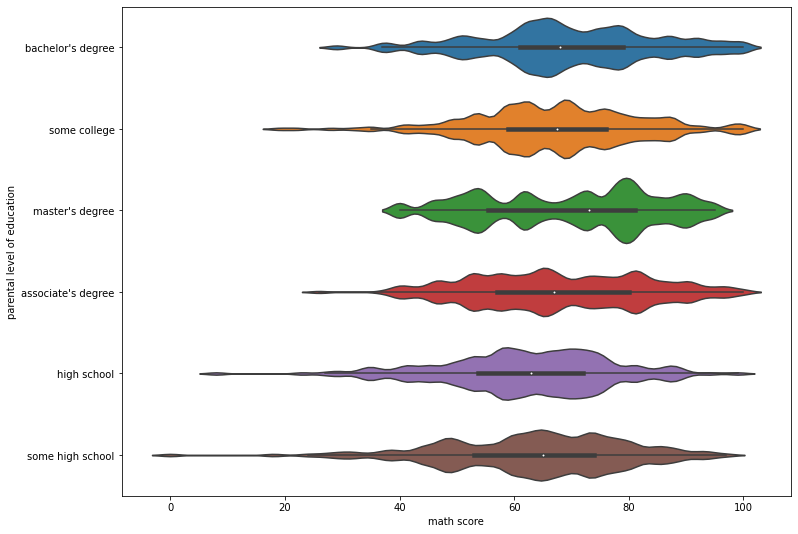

In [64]:
# atau buat liat distributionnya, kita bisa juga edit bandwidthnya
# jadi biar kdenya jadi lebih noisy

plt.figure(figsize=(12,9))
sns.violinplot(y='parental level of education',x='math score',data=df
,split=True,bw=0.1)

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

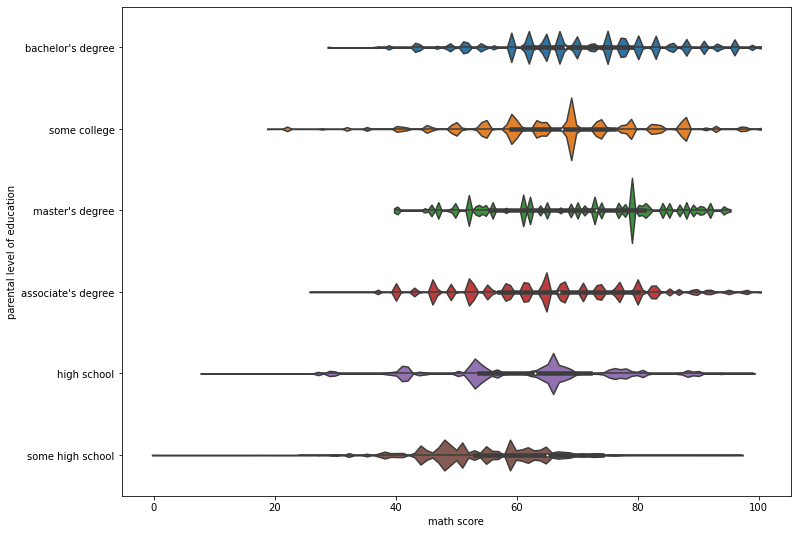

In [65]:
# terlalu kecil juga ga bagus

plt.figure(figsize=(12,9))
sns.violinplot(y='parental level of education',x='math score',data=df
,split=True,bw=0.01)

# Advanced Plots

We can use a boxenplot and swarmplot to achieve the same effect as the boxplot and violinplot, but with slightly more information included. Be careful when using these plots, as they often require you to educate the viewer with how the plot is actually constructed. Only use these if you are sure your audience will understand the visualization.

In [66]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## swarmplot

/Users/clcx/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='math score'>

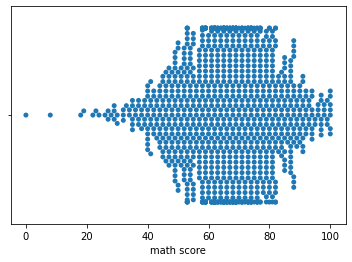

In [67]:
sns.swarmplot(x='math score',data=df)

15.8% titiknya ga muat, jadi kita ada 2 pilihan, 1. gedein figsizenya, 2. kecilin size titiknya, generally orang bakal kecilin titiknya aja

<AxesSubplot:xlabel='math score'>

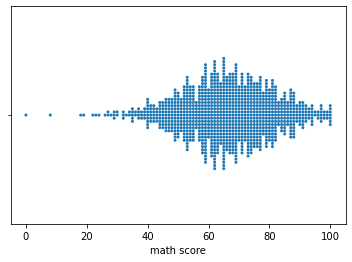

In [70]:
sns.swarmplot(x='math score',data=df,size=3)

<AxesSubplot:xlabel='math score'>

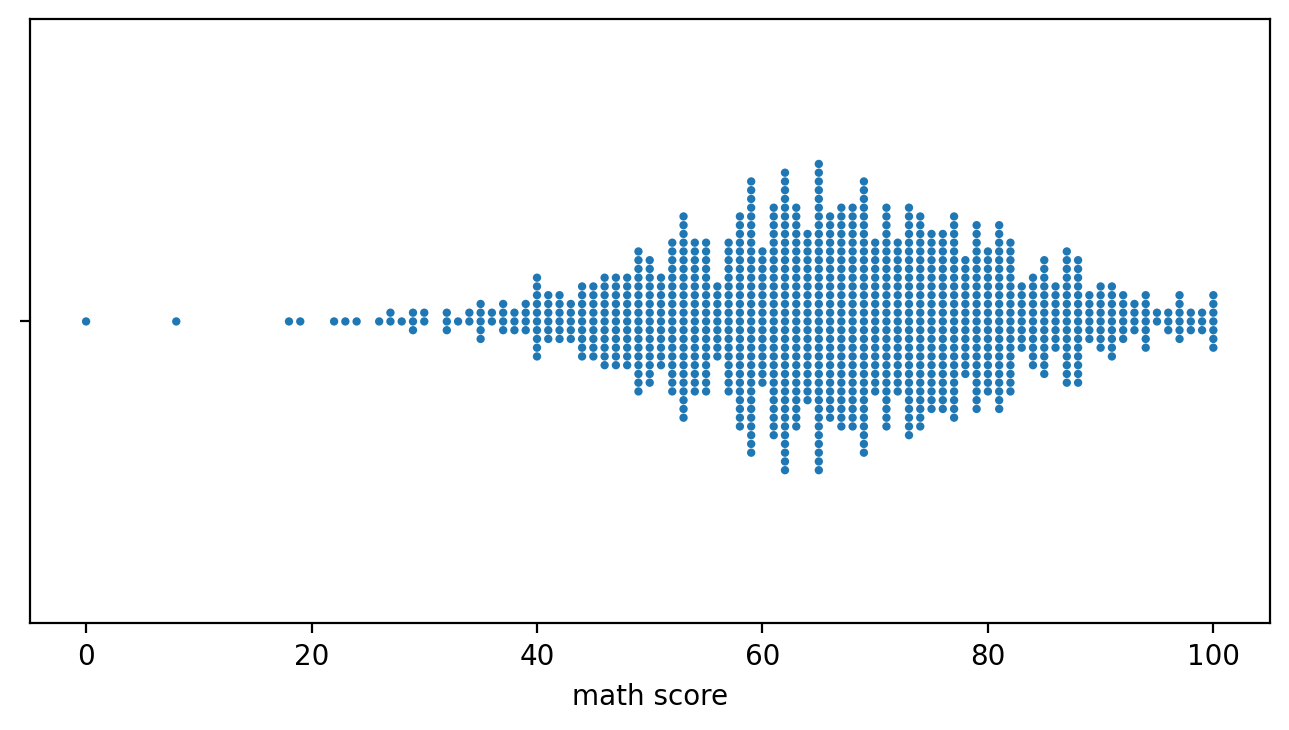

In [71]:
# biar lebih jelas pake pake figure, sama gedein dpi kalo titiknya banyak biar jelas
plt.figure(figsize=(8,4),dpi=200)
sns.swarmplot(x='math score',data=df,size=3)

<AxesSubplot:xlabel='math score', ylabel='gender'>

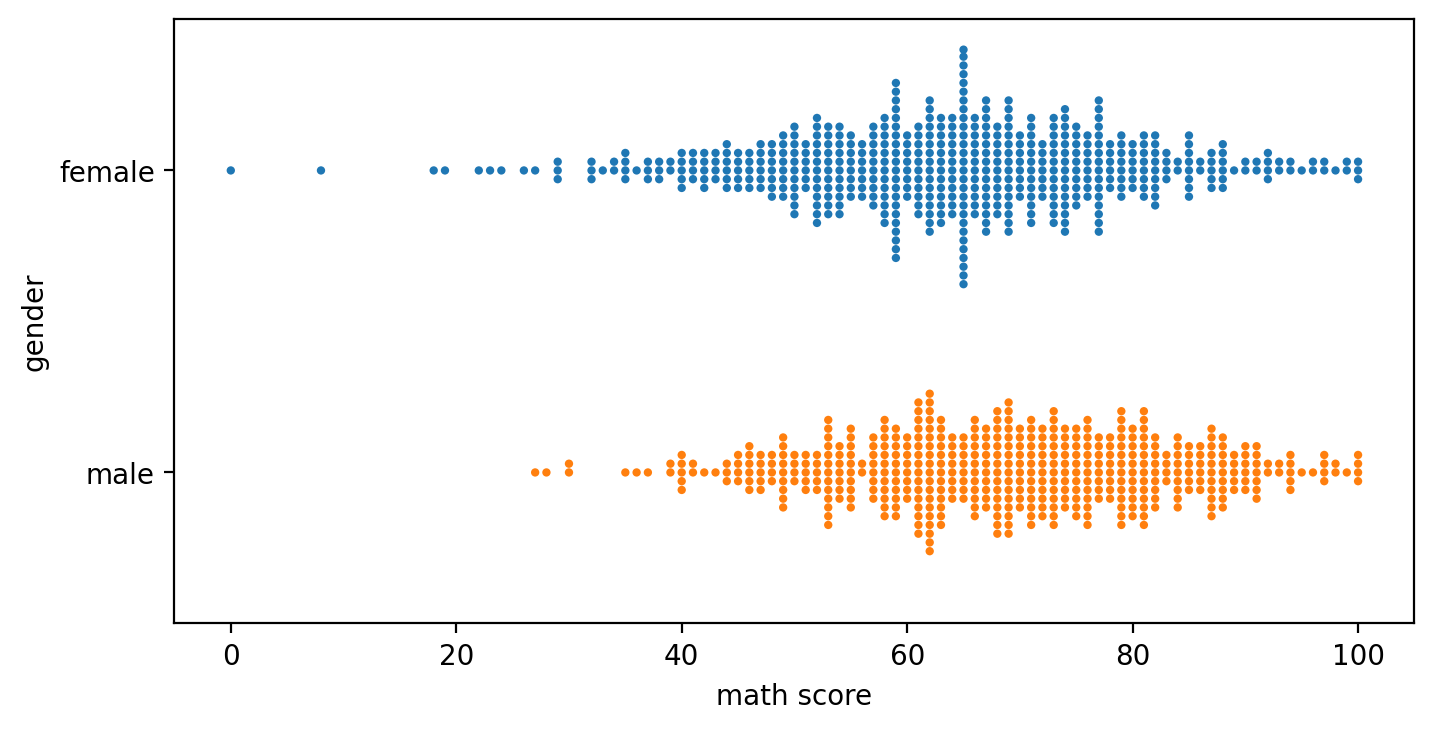

In [73]:
# bisa tambahin y
plt.figure(figsize=(8,4),dpi=200)
sns.swarmplot(x='math score',y='gender',data=df,size=3)

<AxesSubplot:xlabel='math score', ylabel='race/ethnicity'>

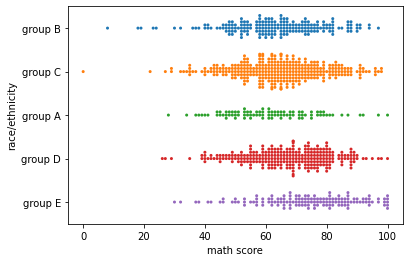

In [74]:
sns.swarmplot(x='math score',y='race/ethnicity',data=df,size=3)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

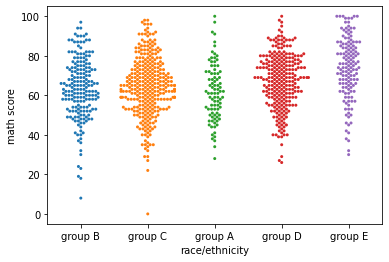

In [75]:
sns.swarmplot(x='race/ethnicity',y='math score',data=df,size=3)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

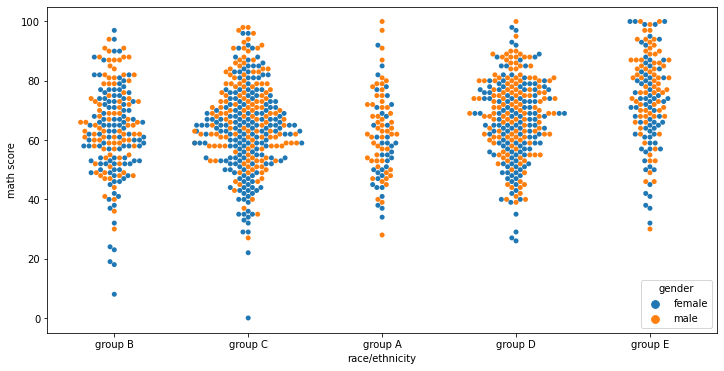

In [76]:
plt.figure(figsize=(12,6))
sns.swarmplot(x='race/ethnicity',y='math score',data=df,hue='gender')

# pake hue di swarmplot bakalan susah dibaca
# apalagi buat color blind

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

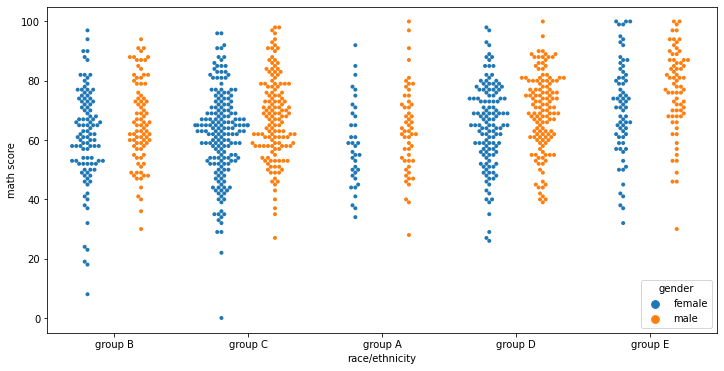

In [79]:
# jadi kalo mau pake hue
# mending pake dodge biar ga nyatu

plt.figure(figsize=(12,6))
sns.swarmplot(x='race/ethnicity',y='math score',data=df,hue='gender',dodge=True,size=4)

### boxenplot (letter-value plot)

Official Paper on this plot: https://vita.had.co.nz/papers/letter-value-plot.html

This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.

<AxesSubplot:xlabel='math score', ylabel='race/ethnicity'>

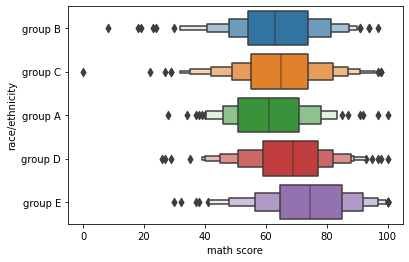

In [80]:
sns.boxenplot(x='math score',y='race/ethnicity',data=df)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

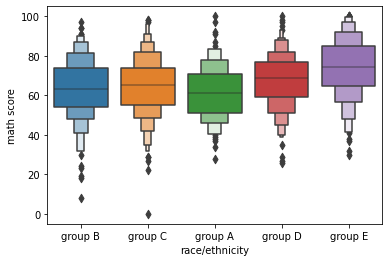

In [81]:
sns.boxenplot(x='race/ethnicity',y='math score',data=df)

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

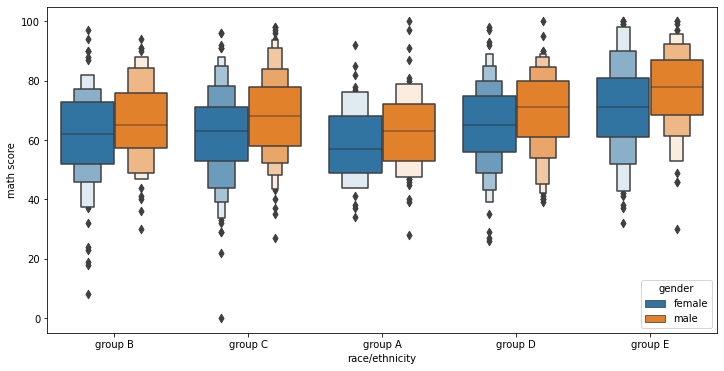

In [84]:
plt.figure(figsize=(12,6))
sns.boxenplot(x='race/ethnicity',y='math score',data=df,hue='gender')

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

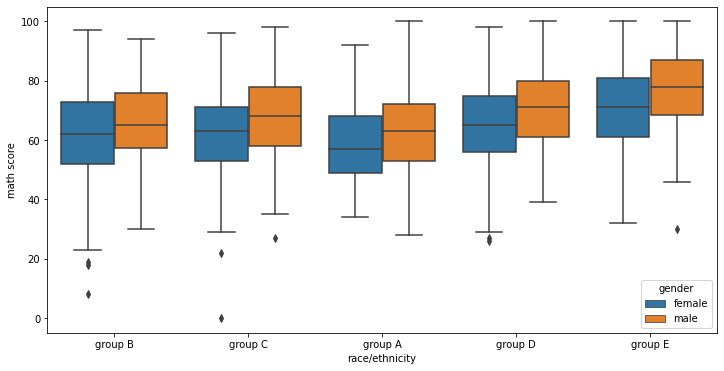

In [85]:
# tinggal apus en nya jadi boxplot deh
plt.figure(figsize=(12,6))
sns.boxplot(x='race/ethnicity',y='math score',data=df,hue='gender')